### Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.linear_model import Lasso, ElasticNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
import joblib
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber, MeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
import numpy
print(numpy.__version__)

1.26.4


### Data extraction

In [4]:
df1 = pd.read_excel('data/X_bp.xlsx',index_col=0)
df2 = pd.read_excel('data/X_nup.xlsx',index_col=0)

In [5]:
# Объединение файлов по индексу, тип объединения — INNER.
X_full=pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

In [6]:
X_full.shape

(1023, 13)

------------------------------------------------------------------------------------------------------------------

### Data splitting
Перед началом анализа и моделированием разделим наш датасет на обучающую (train) и тестовую (test) выборки.

In [7]:
train_df = None
test_df = None

train_df, test_df = train_test_split(X_full, test_size=0.3, random_state=24)

In [8]:
train_df.shape

(716, 13)

In [9]:
test_df.shape

(307, 13)

------------------------------------------------------------------------------------------------------------------

### Exploratory data analysis (EDA)

In [10]:
train_df.sort_index()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
7,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0,7.000000,47.000000
8,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0,7.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,1.646235,2014.772547,841.064806,102.979906,21.073367,271.490843,615.168127,79.154469,2518.516089,232.428214,90,5.048503,59.837798
1016,3.745862,1914.629424,680.683701,110.979100,25.922635,309.796388,628.364550,76.030555,2466.925422,152.184720,90,8.057020,47.067229
1017,2.758727,2000.506141,934.564388,143.021859,21.379518,273.852679,65.105965,67.633752,3102.539548,229.780372,90,8.736592,60.277805
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 965 to 418
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       716 non-null    float64
 1   Плотность, кг/м3                      716 non-null    float64
 2   модуль упругости, ГПа                 716 non-null    float64
 3   Количество отвердителя, м.%           716 non-null    float64
 4   Содержание эпоксидных групп,%_2       716 non-null    float64
 5   Температура вспышки, С_2              716 non-null    float64
 6   Поверхностная плотность, г/м2         716 non-null    float64
 7   Модуль упругости при растяжении, ГПа  716 non-null    float64
 8   Прочность при растяжении, МПа         716 non-null    float64
 9   Потребление смолы, г/м2               716 non-null    float64
 10  Угол нашивки, град                    716 non-null    int64  
 11  Шаг нашивки           

In [12]:
train_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,2.938630,1976.201382,740.540486,109.812736,22.283853,287.762604,487.730652,73.322714,2473.914955,215.966621,44.497207,6.931312,57.574563
std,0.904485,72.181933,327.298347,28.075420,2.417788,40.246055,281.095529,3.126232,487.999608,59.593615,45.028647,2.504751,12.416799
min,0.389403,1731.764635,2.436909,17.740275,14.254985,160.255843,0.603740,64.054061,1036.856605,41.048278,0.000000,0.145034,11.740126
25%,2.321159,1925.617717,497.478057,91.558119,20.656842,262.048971,271.039351,71.220294,2132.791054,177.004666,0.000000,5.102256,50.250032
50%,2.923913,1977.797890,744.404008,110.258262,22.267857,286.220763,463.506297,73.308795,2455.555556,217.827171,0.000000,6.957804,57.900789
75%,3.557953,2020.158764,964.414744,129.728210,23.990777,314.774484,697.043720,75.355670,2771.368187,256.749159,90.000000,8.585130,65.268012
max,5.455566,2192.738783,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.051383,103.988901


In [13]:
train_df_info = pd.DataFrame({
    "DataType": train_df.dtypes,
    "MissingValues": train_df.isnull().sum(),
    "UniqueValues": train_df.nunique()
}).sort_values(by="MissingValues", ascending=False)

train_df_info['MissingValuesRatio'] = round(train_df_info['MissingValues'] / len(train_df),2)

train_df_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
Соотношение матрица-наполнитель,float64,0,711,0.0
"Плотность, кг/м3",float64,0,712,0.0
"модуль упругости, ГПа",float64,0,715,0.0
"Количество отвердителя, м.%",float64,0,704,0.0
"Содержание эпоксидных групп,%_2",float64,0,704,0.0
"Температура вспышки, С_2",float64,0,702,0.0
"Поверхностная плотность, г/м2",float64,0,704,0.0
"Модуль упругости при растяжении, ГПа",float64,0,704,0.0
"Прочность при растяжении, МПа",float64,0,704,0.0
"Потребление смолы, г/м2",float64,0,703,0.0


Пропущенных значений нет. Параметр "Угол нашивки, град" явно является бинарной переменной.

In [14]:
train_df['Угол нашивки, град'].unique()

array([90,  0], dtype=int64)

Параметр "Угол нашивки, град" принимает значения 0 и 90. 
Можно применить метод One-Hot Encoding, но нормализация даст тот же результат.

#### Visualization

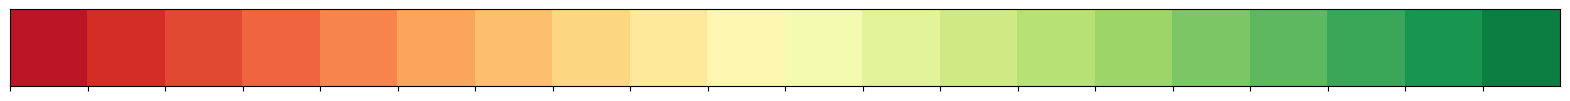

In [15]:
# Зададим 1 палетку для всех визуализаций
selected_palette = sns.color_palette("RdYlGn", n_colors=20)

sns.palplot(selected_palette)
plt.show()

In [16]:
# Определим numeric_variables
numeric_variables = []

for column in train_df.columns:
    if train_df[column].dtype in ['float64', 'int64'] and train_df[column].nunique() >2:
                numeric_variables.append(column)
        
numeric_variables

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Шаг нашивки',
 'Плотность нашивки']

#### 1) BOXPLOTS

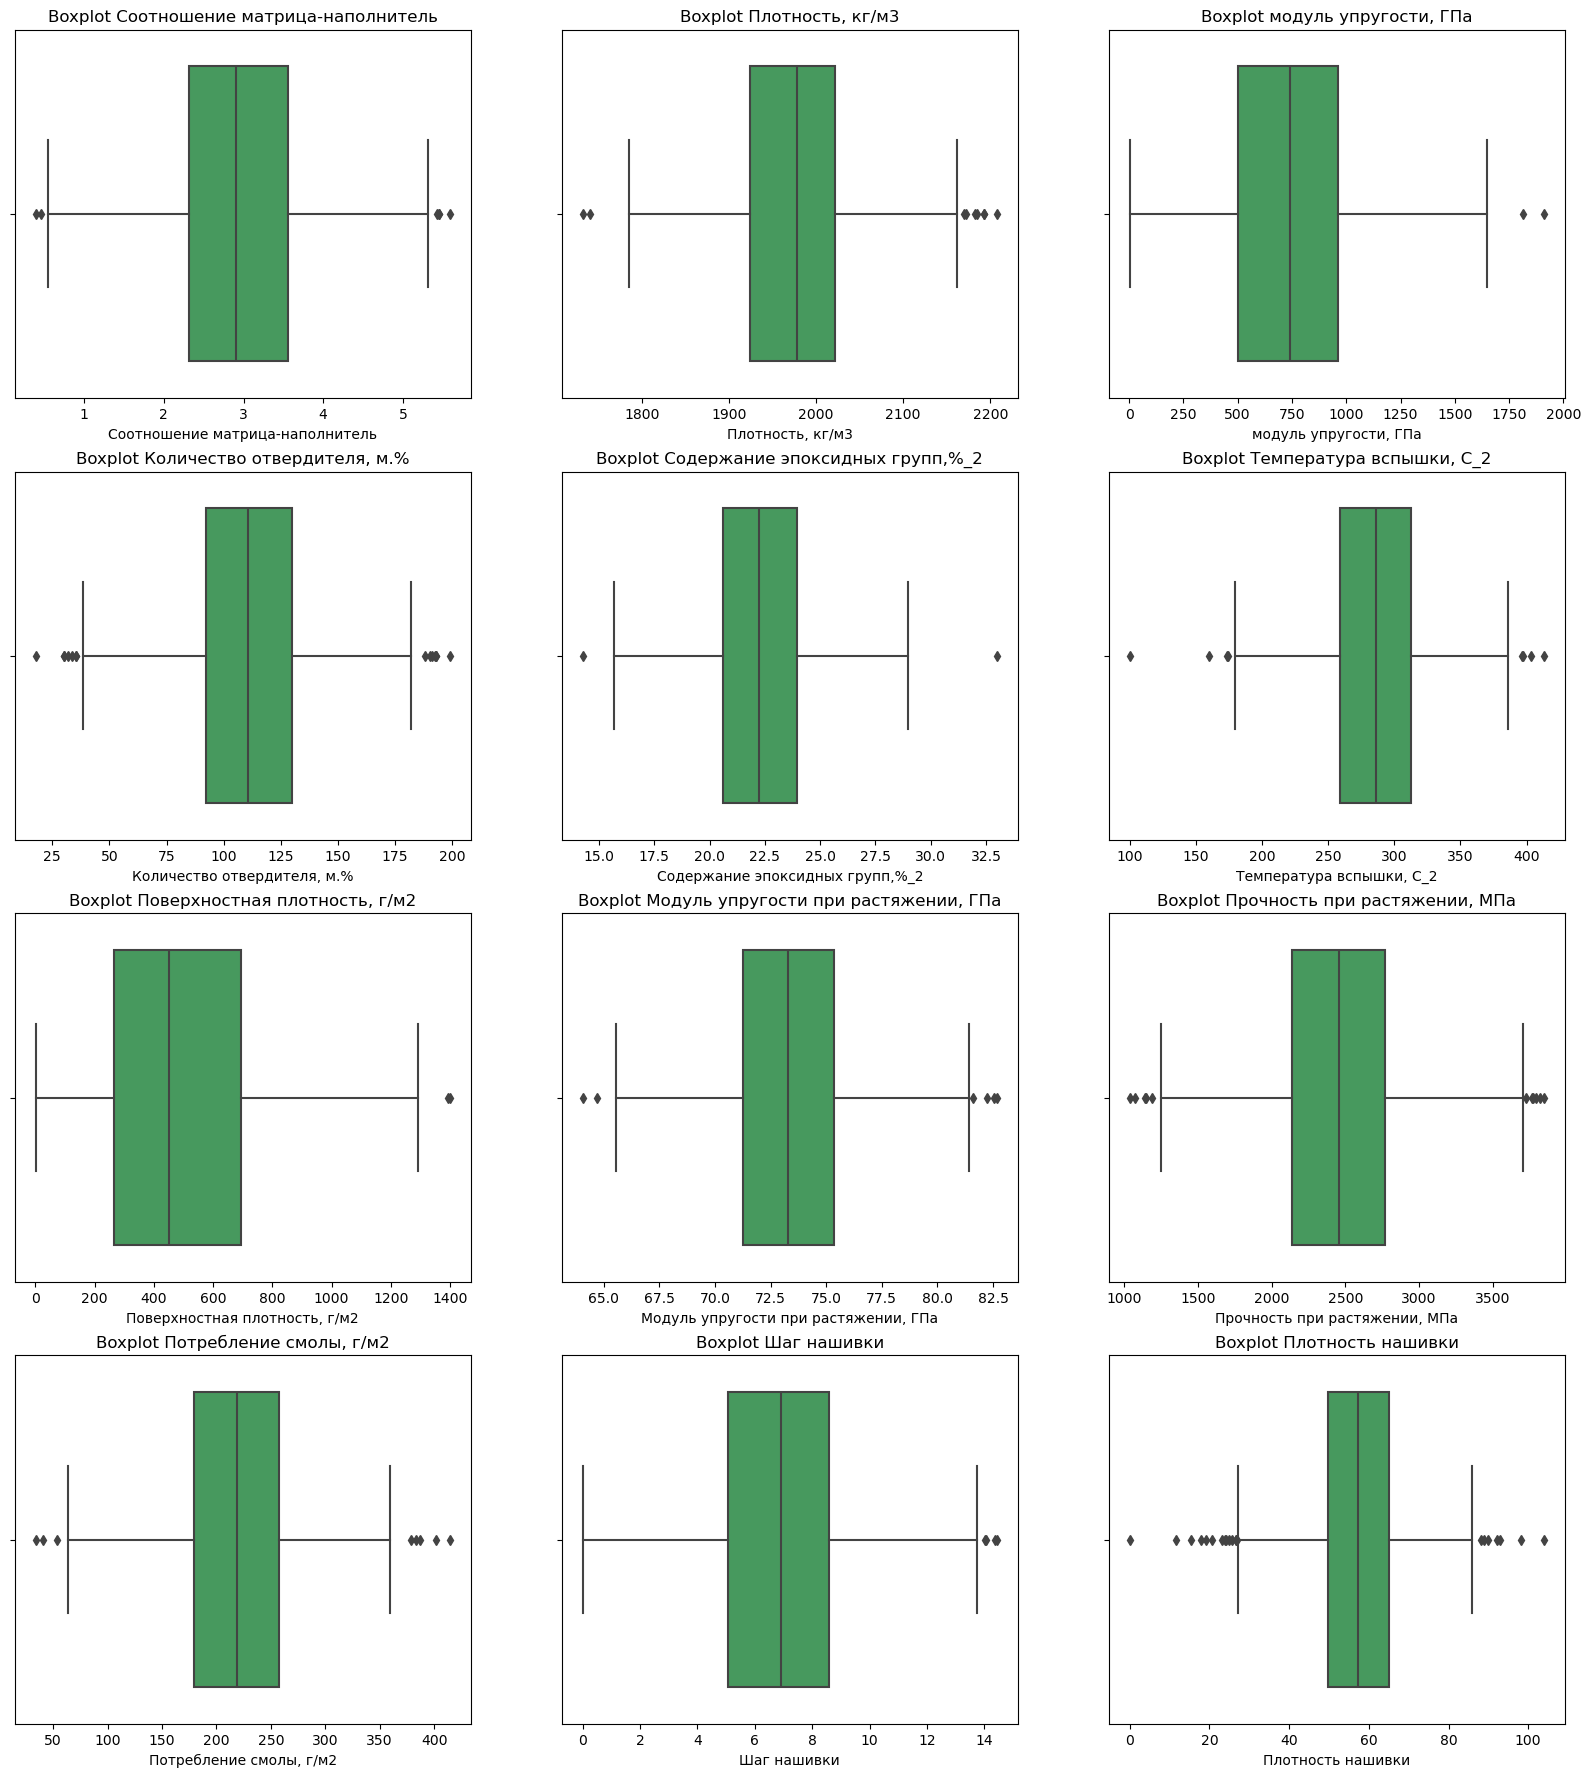

In [17]:
# Создание полотна с подгруппами для боксплотов
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 22)) 

# Разворачиваем матрицу графиков и перебираем столбцы
for ax, column in zip(axes.flat, numeric_variables):
    sns.boxplot(x=X_full[column], ax=ax, color=selected_palette[17])
    ax.set_title(f"Boxplot {column}")

plt.show()

In [18]:
outlier_results = []

for column in numeric_variables:
    Q1 = X_full[column].quantile(0.25)
    Q3 = X_full[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    # Левый ус: минимум между расчетной границей и фактическим минимальным значением
    lower_bound = max(X_full[column].min(), Q1 - 1.5 * IQR)
    
    # Правый ус: максимум между расчетной границей и фактическим максимальным значением
    upper_bound = min(X_full[column].max(), Q3 + 1.5 * IQR)
    
    X_full_no_outliers = X_full[(X_full[column] >= lower_bound) & (X_full[column] <= upper_bound)]
    
    outlier_ratio = round(((len(X_full) - len(X_full_no_outliers)) / len(X_full) * 100), 2)
    
    outlier_results.append({'Column': column, 'Outlier Ratio': outlier_ratio})

outlier_results_df = pd.DataFrame(outlier_results)
outlier_results_df

,Column,Outlier Ratio
0,Соотношение матрица-наполнитель,0.59
1,"Плотность, кг/м3",0.88
2,"модуль упругости, ГПа",0.20
3,"Количество отвердителя, м.%",1.37
4,"Содержание эпоксидных групп,%_2",0.20
5,"Температура вспышки, С_2",0.78
6,"Поверхностная плотность, г/м2",0.20
7,"Модуль упругости при растяжении, ГПа",0.59
8,"Прочность при растяжении, МПа",1.08
9,"Потребление смолы, г/м2",0.78


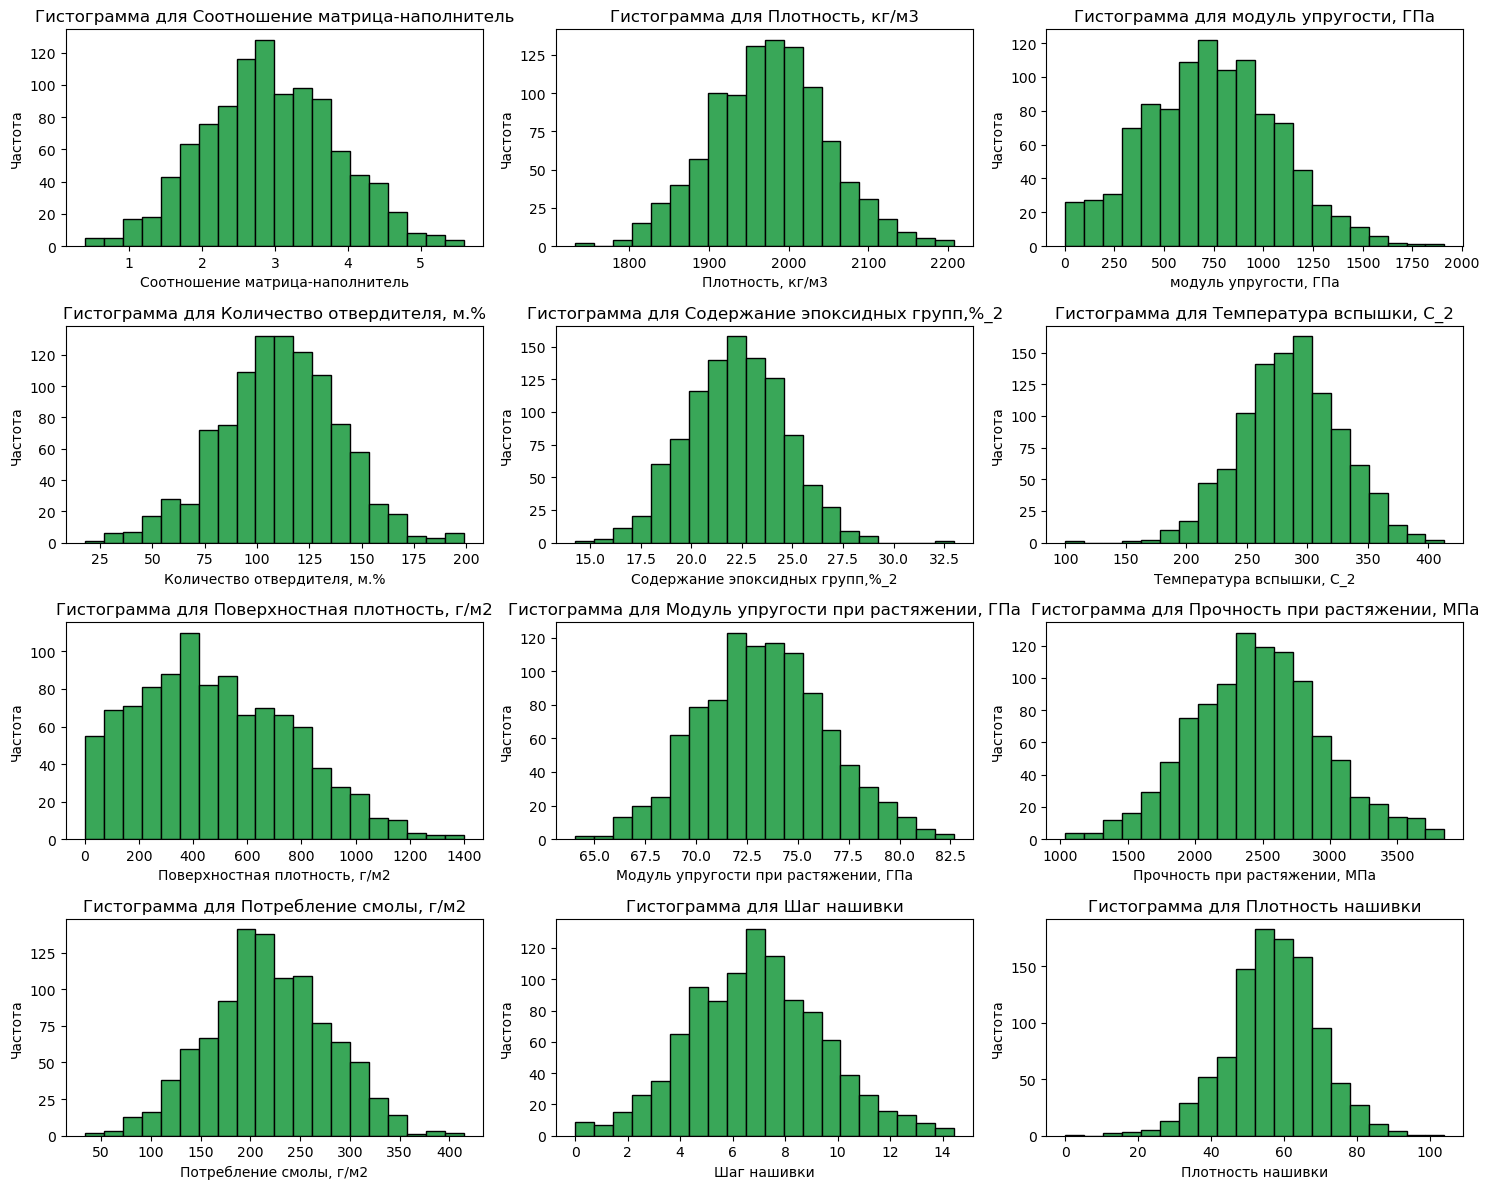

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
flattened_axes = axes.flatten()

# Проходим по каждому столбцу из numeric_variables и создаем гистограмму
for i, column in enumerate(numeric_variables):
    flattened_axes[i].hist(X_full[column], bins=20, color=selected_palette[17], edgecolor='black')
    flattened_axes[i].set_title(f"Гистограмма для {column}")
    flattened_axes[i].set_xlabel(column)
    flattened_axes[i].set_ylabel("Частота")

# Отключаем неиспользуемые оси
for j in range(len(numeric_variables), len(flattened_axes)):
    flattened_axes[j].axis('off')

plt.tight_layout()
plt.show()

Как видим, распределение для всех показателей близко к нормальному

#### 2) Correlation

In [20]:
train_df.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,-0.003061,0.023395,-0.032594,0.008830,0.003026,-0.001946,0.014103,0.054933,0.087770,-0.024711,0.076988,0.005899
"Плотность, кг/м3",-0.003061,1.000000,-0.027484,-0.058541,-0.002683,-0.019079,0.051220,0.005334,-0.061671,-0.048498,-0.079615,-0.077900,0.116064
"модуль упругости, ГПа",0.023395,-0.027484,1.000000,0.015667,-0.007591,0.031150,-0.000098,0.041089,0.085889,0.025590,-0.030917,-0.003139,0.068664
"Количество отвердителя, м.%",-0.032594,-0.058541,0.015667,1.000000,0.015343,0.110042,0.058345,-0.108657,-0.102406,0.014695,0.049691,0.036111,0.043784
"Содержание эпоксидных групп,%_2",0.008830,-0.002683,-0.007591,0.015343,1.000000,-0.017745,-0.024149,0.046965,0.003308,0.010735,0.021030,-0.020607,-0.010278
"Температура вспышки, С_2",0.003026,-0.019079,0.031150,0.110042,-0.017745,1.000000,0.011188,0.011846,-0.034315,0.059872,0.031078,0.019855,0.019982
"Поверхностная плотность, г/м2",-0.001946,0.051220,-0.000098,0.058345,-0.024149,0.011188,1.000000,0.020543,-0.003493,0.001172,0.045272,0.051402,-0.040825
"Модуль упругости при растяжении, ГПа",0.014103,0.005334,0.041089,-0.108657,0.046965,0.011846,0.020543,1.000000,-0.044387,0.046713,0.024260,-0.033489,0.001437
"Прочность при растяжении, МПа",0.054933,-0.061671,0.085889,-0.102406,0.003308,-0.034315,-0.003493,-0.044387,1.000000,0.034359,0.045494,-0.047721,0.025672
"Потребление смолы, г/м2",0.087770,-0.048498,0.025590,0.014695,0.010735,0.059872,0.001172,0.046713,0.034359,1.000000,-0.019735,0.021858,0.007059


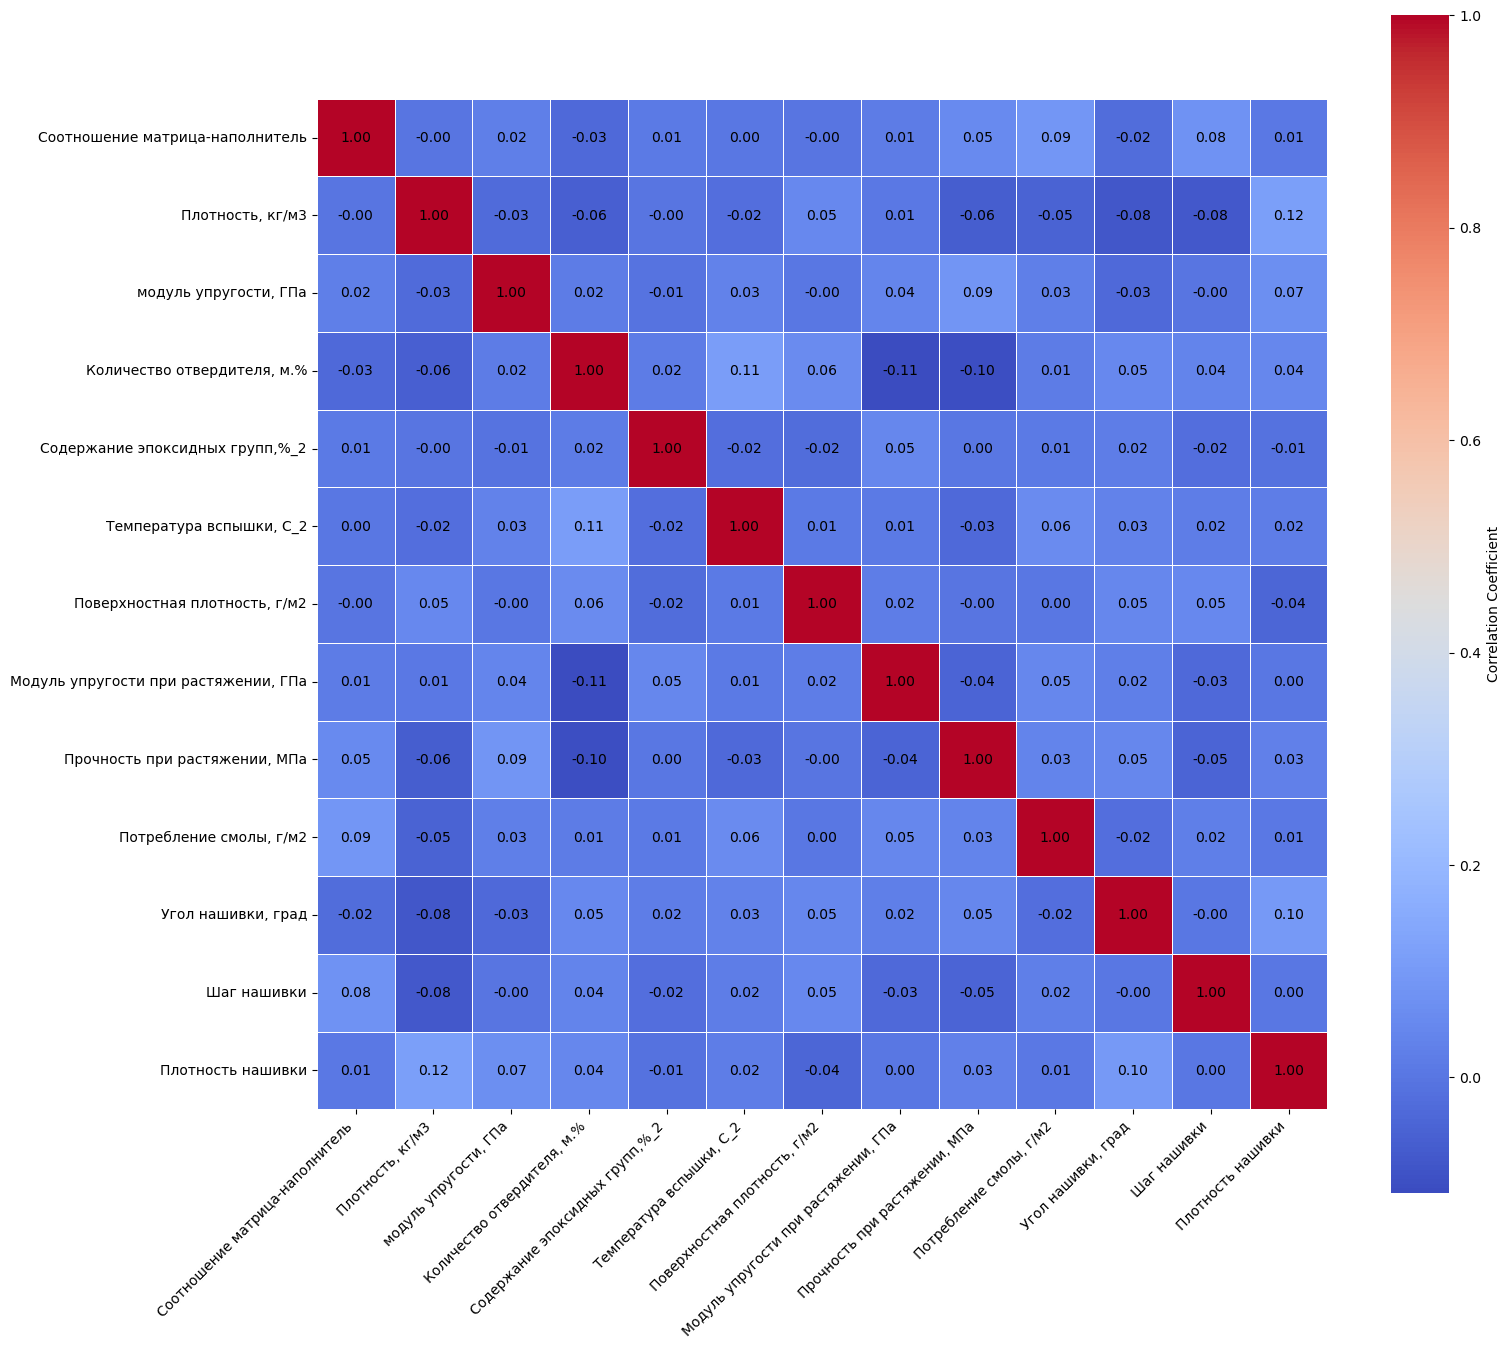

In [21]:

# Корреляционная матрица
corr_matrix = train_df.corr()

# Настройка фигуры для большего размера
plt.figure(figsize=(16, 14))

# Построение тепловой карты без аннотаций
ax = sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', 
                 linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'},
                 square=True, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

# Добавляем числа вручную в каждый квадратик
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10, color='black')

# Поворот подписей осей для лучшей читаемости
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Автоматическая подгонка размера
plt.tight_layout()

# Отображение графика
plt.show()

#### 3) Outliers

In [22]:
# Проверка выбросов по методу 3-х сигм
def check_outliers_3sigma(df):
    mean = df.mean()
    std = df.std()
    outliers_3sigma = (df < mean - 3*std) | (df > mean + 3*std)
    return outliers_3sigma

# Проверка выбросов методом IQR
def check_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_IQR = (df < lower_bound) | (df > upper_bound)
    return outliers_IQR

# Применяем оба метода для анализа выбросов
numeric_df = train_df[numeric_variables]
outliers_3sigma = check_outliers_3sigma(train_df)
outliers_IQR = check_outliers_IQR(train_df)

In [23]:
# Считаем количество выбросов для каждого столбца
outliers_3sigma_count = outliers_3sigma.sum()
outliers_IQR_count = outliers_IQR.sum()

# Создаем датафрейм для вывода результатов
outlier_results_df = pd.DataFrame({
    'Column': train_df.columns,
    'Выбросы_3sigma': outliers_3sigma_count.values,
    'Выбросы_IQR': outliers_IQR_count.values
})

# Печатаем таблицу с результатами
print("Таблица с результатами проверки выбросов по методам 3-х сигм и IQR:")
print(outlier_results_df)

Таблица с результатами проверки выбросов по методам 3-х сигм и IQR:
                                  Column  Выбросы_3sigma  Выбросы_IQR
0        Соотношение матрица-наполнитель               0            5
1                       Плотность, кг/м3               2            6
2                  модуль упругости, ГПа               2            2
3            Количество отвердителя, м.%               2            6
4        Содержание эпоксидных групп,%_2               2            2
5               Температура вспышки, С_2               2            5
6          Поверхностная плотность, г/м2               2            2
7   Модуль упругости при растяжении, ГПа               0            5
8          Прочность при растяжении, МПа               0            8
9                Потребление смолы, г/м2               1            5
10                    Угол нашивки, град               0            0
11                           Шаг нашивки               0            2
12                    

In [24]:
# Исключаем выбросы методом межквартильного расстояния (IQR)
train_df_no_outliers_IQR = train_df.copy()
for column in train_df.columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df_no_outliers_IQR = train_df_no_outliers_IQR[(train_df_no_outliers_IQR[column] >= lower_bound) & (train_df_no_outliers_IQR[column] <= upper_bound)]

# Удаление строк с выбросами
print(f"Размерность данных до удаления выбросов методом IQR: {train_df.shape}")
print(f"Размерность данных после удаления выбросов методом IQR: {train_df_no_outliers_IQR.shape}")
difference = len(train_df) - len(train_df_no_outliers_IQR)
print(f"Удалено: {difference} строк")

Размерность данных до удаления выбросов методом IQR: (716, 13)
Размерность данных после удаления выбросов методом IQR: (657, 13)
Удалено: 59 строк


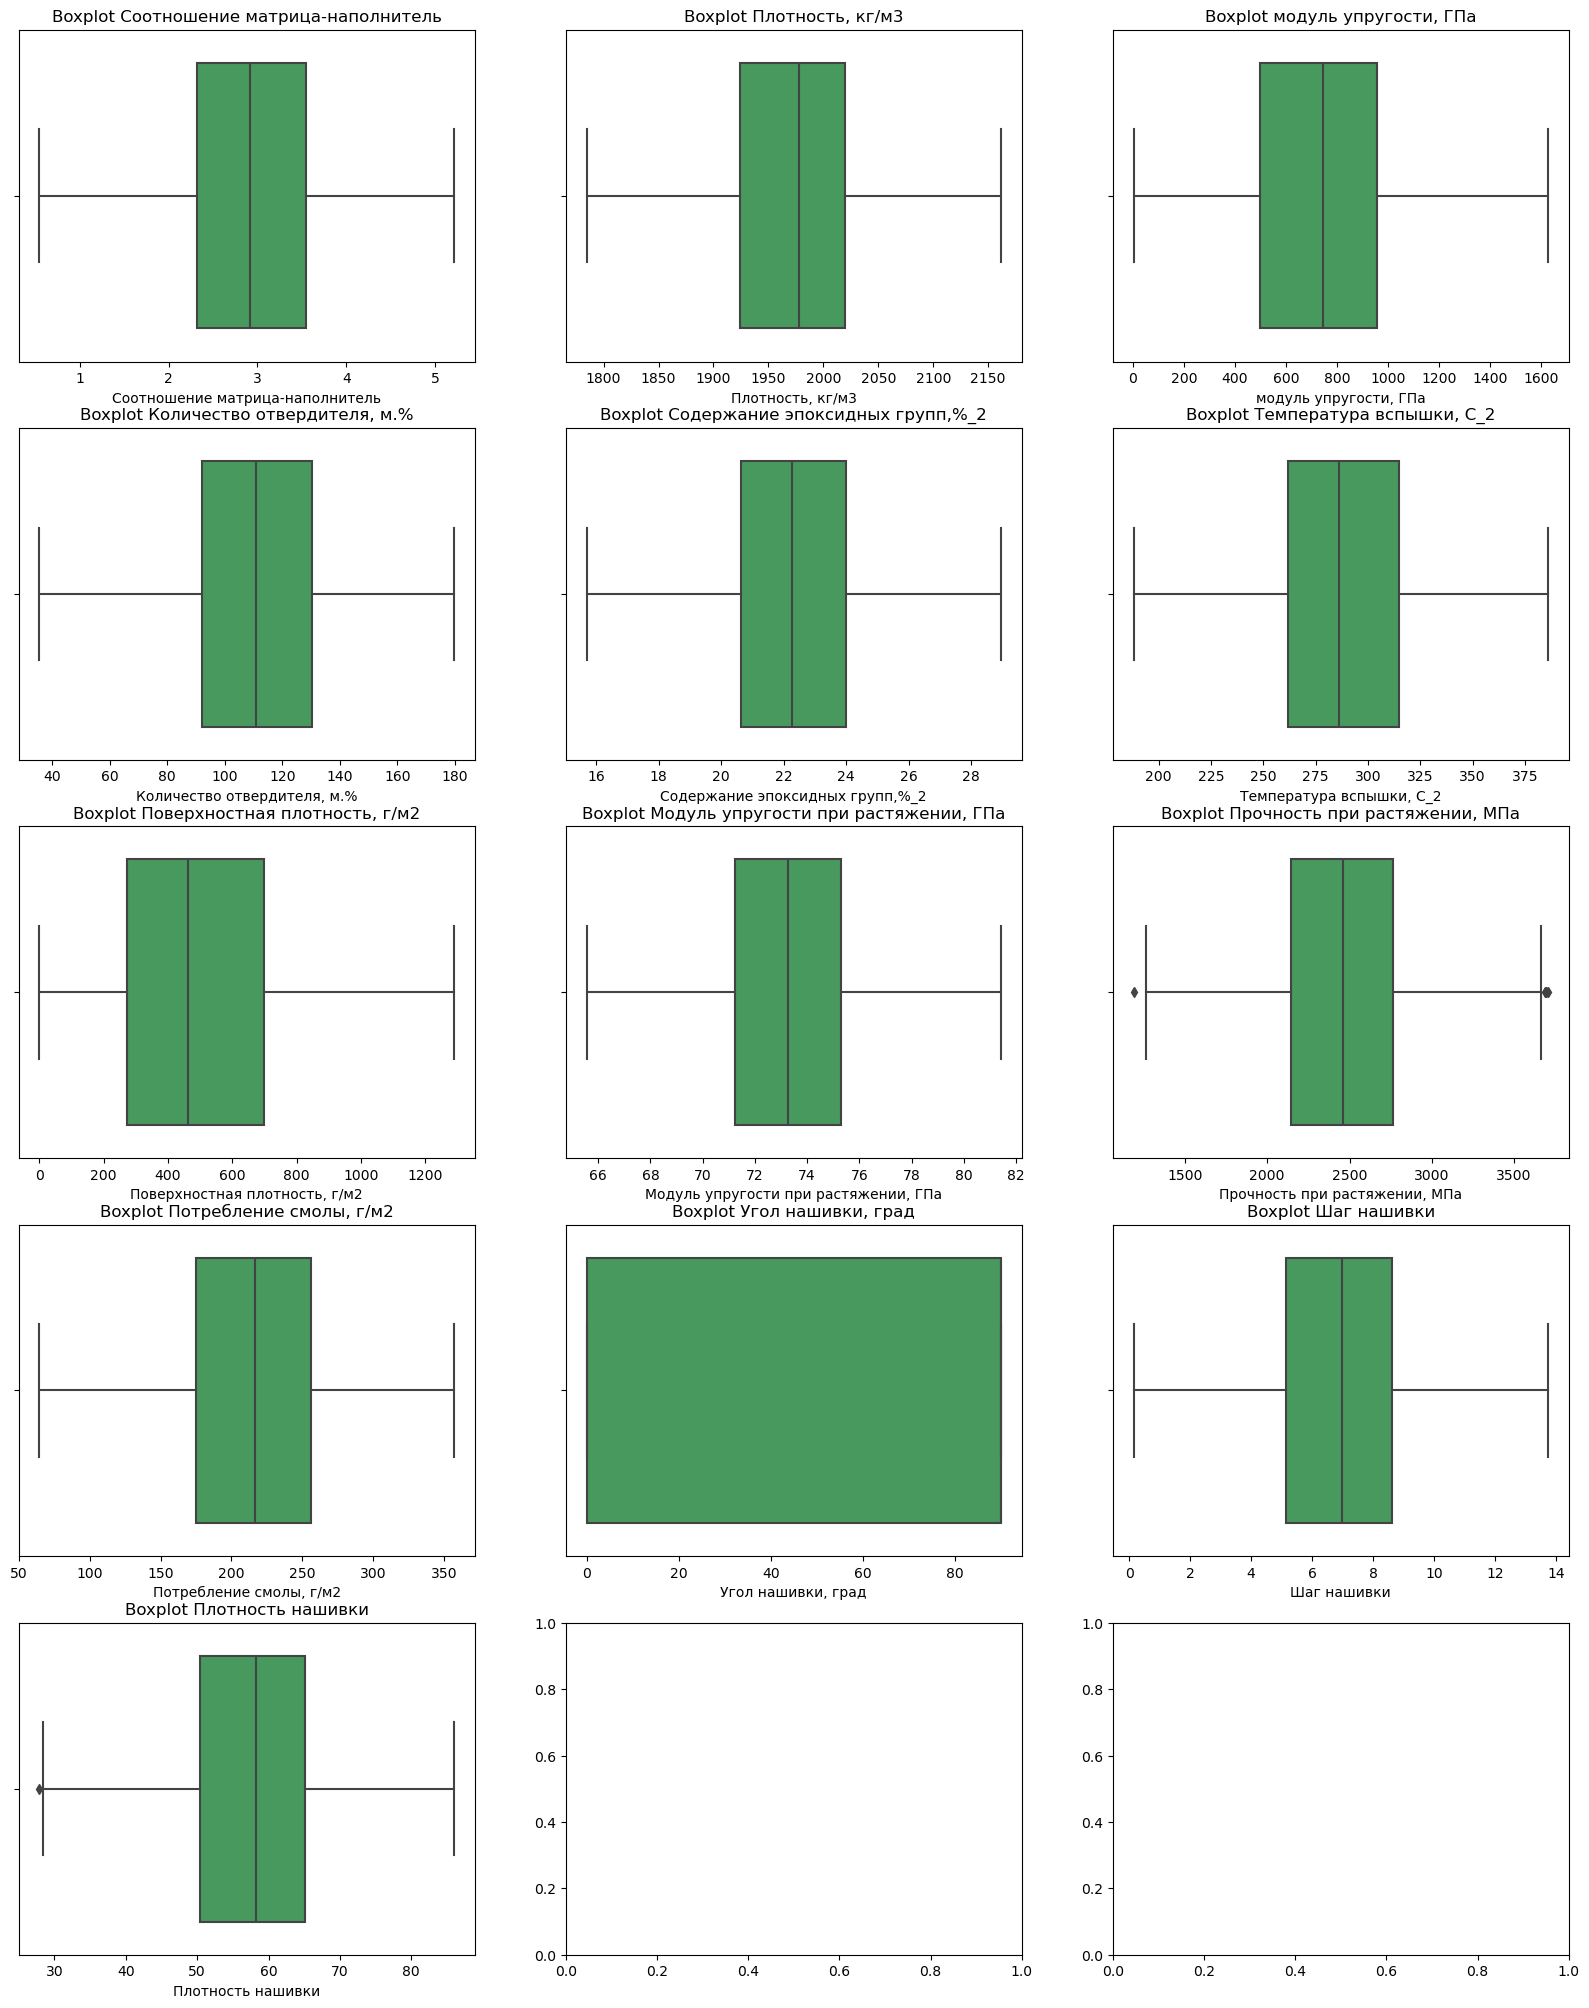

In [25]:
# Визуализируем датасет без выбросов
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25)) 
for ax, column in zip(axes.flat, train_df_no_outliers_IQR):
    sns.boxplot(x=train_df_no_outliers_IQR[column], ax=ax, color=selected_palette[17])
    ax.set_title(f"Boxplot {column}")

Выбросы еще имеются. Попробуем повторить удаление выбросов

In [26]:
for _ in range(1):
    train_df_cleaned = train_df_no_outliers_IQR.copy()
    for column in train_df_cleaned.columns:
        Q1 = train_df_cleaned[column].quantile(0.25)
        Q3 = train_df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_df_cleaned = train_df_cleaned[(train_df_cleaned[column] >= lower_bound) & (train_df_cleaned[column] <= upper_bound)]


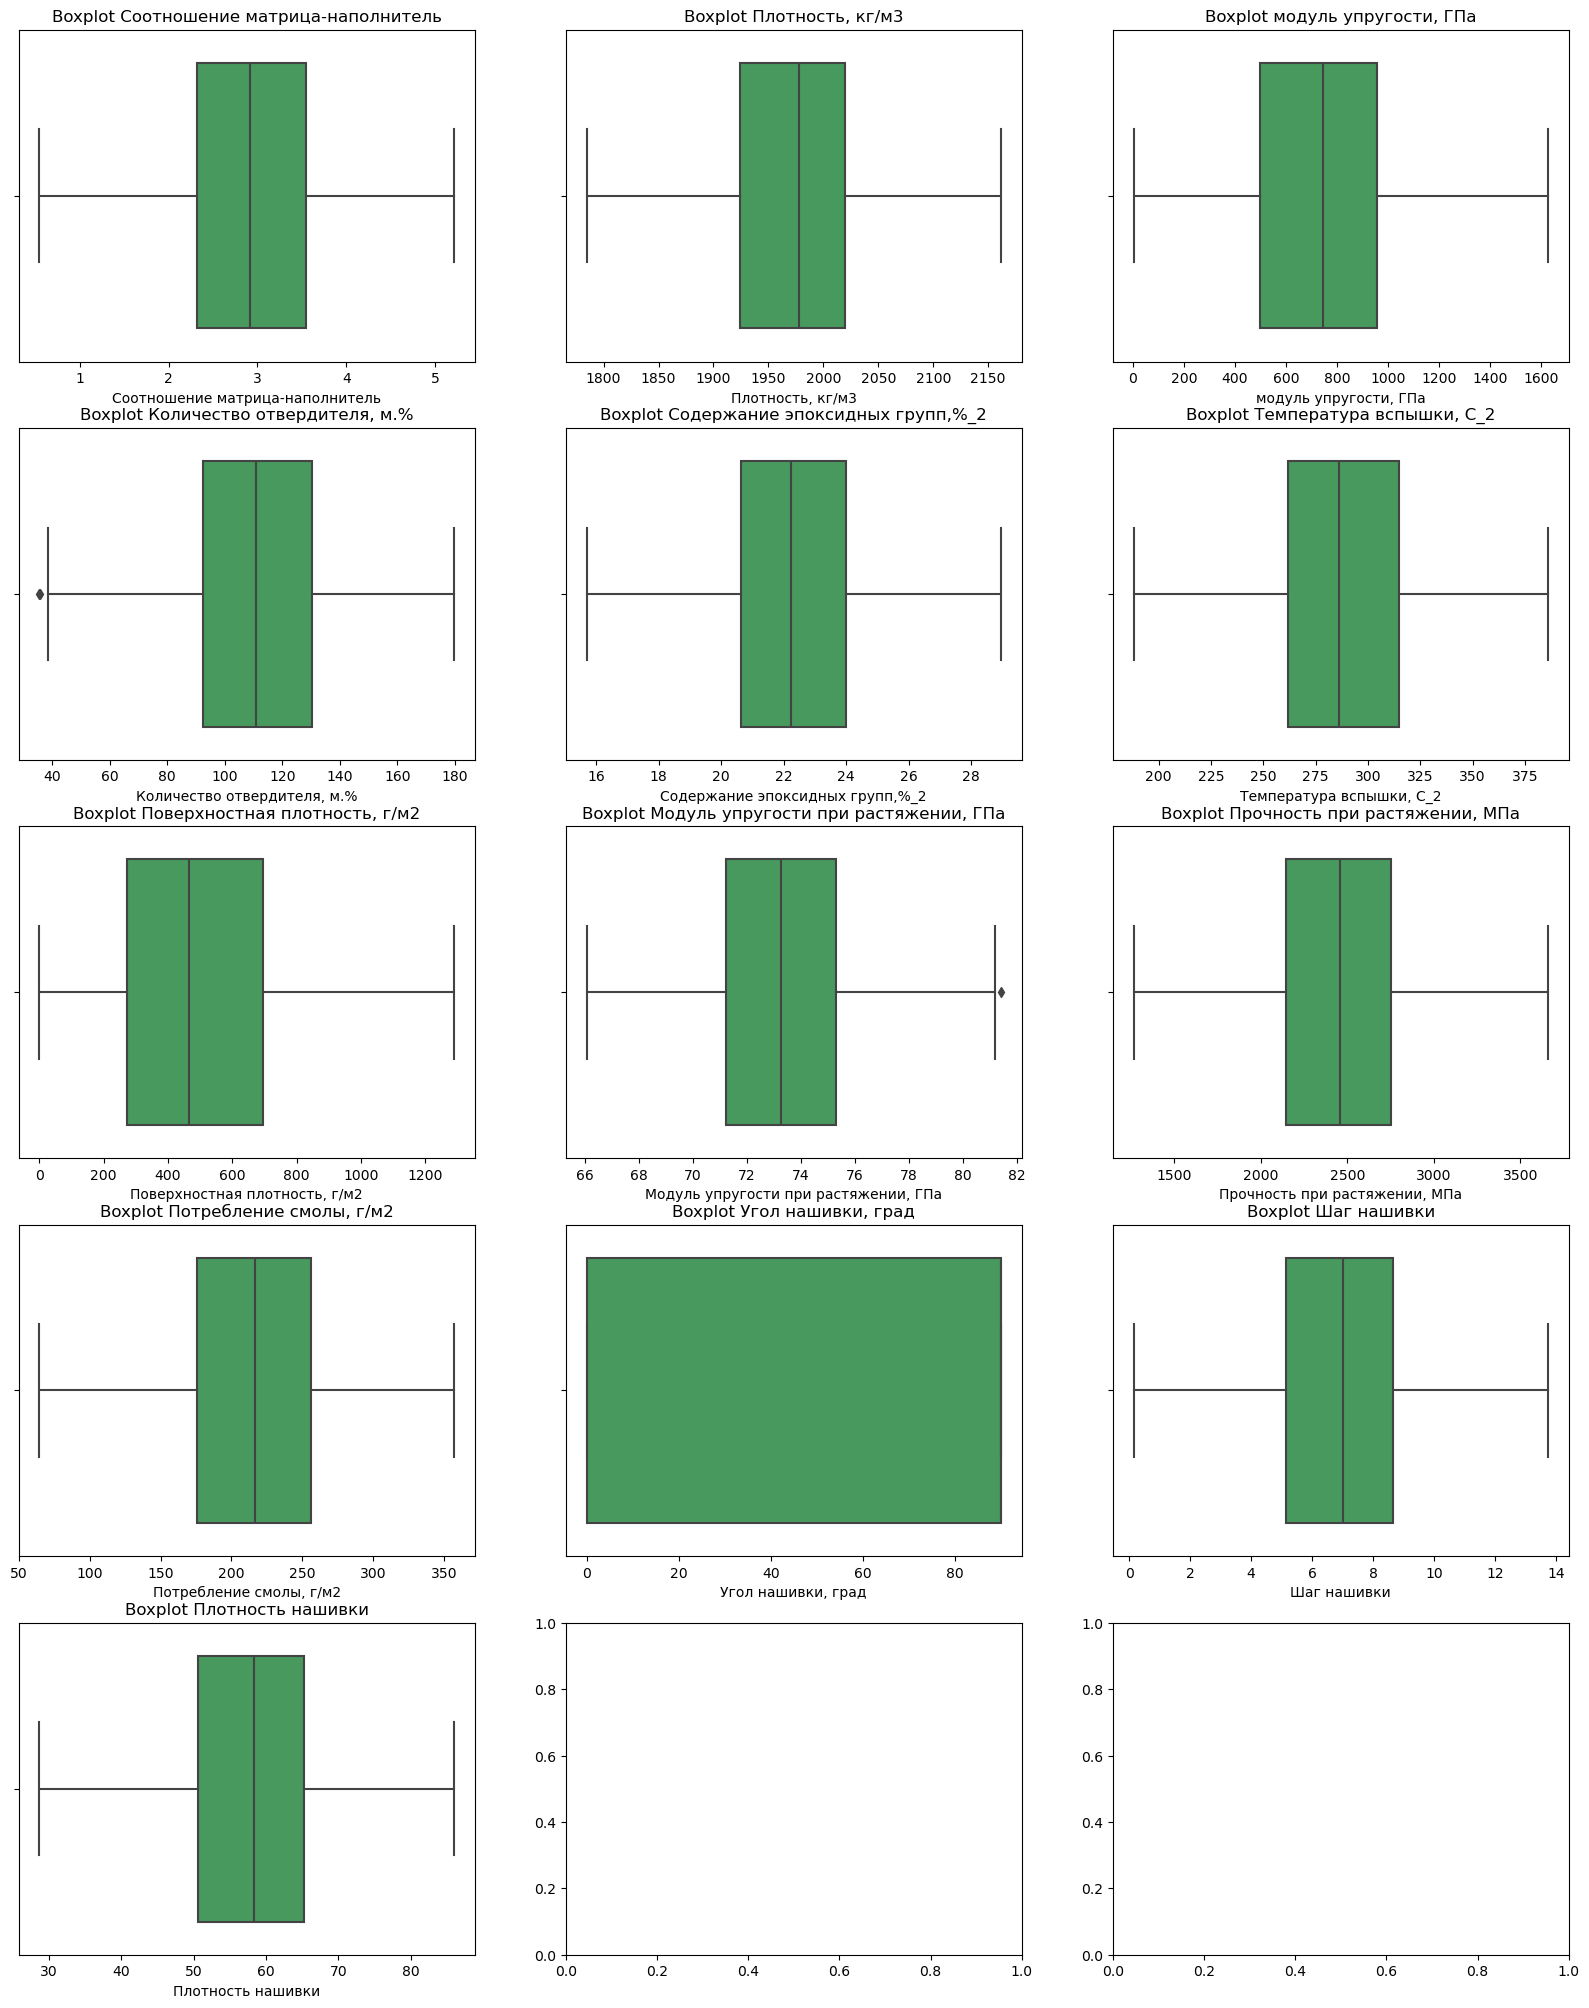

In [27]:
# Визуализируем датасет
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25)) 
for ax, column in zip(axes.flat, train_df_cleaned):
    sns.boxplot(x=train_df_cleaned[column], ax=ax, color=selected_palette[17])
    ax.set_title(f"Boxplot {column}")

In [28]:
print(f"Размерность данных после удаления выбросов методом IQR: {train_df_cleaned.shape}")
difference1 = len(train_df_no_outliers_IQR) - len(train_df_cleaned)
print(f"Удалено: {difference1} строк")

Размерность данных после удаления выбросов методом IQR: (650, 13)
Удалено: 7 строк


### 5) Normalization

In [29]:
scaler = MinMaxScaler()
train_df_cleaned_normalized = scaler.fit_transform(train_df_cleaned)
test_df_normalized = scaler.transform(test_df)

In [30]:
# Преобразуем результат в DataFrame с оригинальными именами столбцов
train_df_cleaned_normalized_df = pd.DataFrame(train_df_cleaned_normalized, columns=train_df_cleaned.columns)
test_df_normalized_df = pd.DataFrame(test_df_normalized, columns=test_df.columns)

# Получаем минимальные и максимальные значения для каждого столбца после нормализации
train_df_cleaned_normalized_min_max = pd.DataFrame({
    "Min": train_df_cleaned_normalized_df.min(),
    "Max": train_df_cleaned_normalized_df.max()
})

print("Минимальные и максимальные значения показателей датасета после нормализации:")
print(train_df_cleaned_normalized_min_max)

Минимальные и максимальные значения показателей датасета после нормализации:
                                      Min  Max
Соотношение матрица-наполнитель       0.0  1.0
Плотность, кг/м3                      0.0  1.0
модуль упругости, ГПа                 0.0  1.0
Количество отвердителя, м.%           0.0  1.0
Содержание эпоксидных групп,%_2       0.0  1.0
Температура вспышки, С_2              0.0  1.0
Поверхностная плотность, г/м2         0.0  1.0
Модуль упругости при растяжении, ГПа  0.0  1.0
Прочность при растяжении, МПа         0.0  1.0
Потребление смолы, г/м2               0.0  1.0
Угол нашивки, град                    0.0  1.0
Шаг нашивки                           0.0  1.0
Плотность нашивки                     0.0  1.0


----------------------------------------------------------------------------------------

### X & Y

#### Для 1 задачи

Разделение исходного датасета:

In [31]:
# Обучающий датасет
X_train_df=train_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

y_train_df=train_df['Модуль упругости при растяжении, ГПа']

In [32]:
# Тестовый датасет
X_test_df=test_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

y_test_df=test_df['Модуль упругости при растяжении, ГПа']

Разделение очищенного от выбросов датасета:

In [33]:
X_train_df_cleaned=train_df_cleaned.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

y_train_df_cleaned=train_df_cleaned['Модуль упругости при растяжении, ГПа']

In [34]:
X_train_df_cleaned.shape, y_train_df_cleaned.shape

((650, 12), (650,))

Разделение очищенного от выбросов и нормализованного датасета:

In [35]:
# Обучающий очищенный и нормализованный датасет
X_train_df_cleaned_normalized_df=train_df_cleaned_normalized_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

y_train_df_cleaned_normalized_df=train_df_cleaned_normalized_df['Модуль упругости при растяжении, ГПа']

In [36]:
y_test

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.496923,0.601148,0.751795,0.555651,0.190238,0.776318,0.751811,0.827908,0.548694,1.0,0.431717,0.547274
1,0.222335,0.585729,0.649210,0.774718,0.485001,0.429826,0.076095,0.731016,0.218307,1.0,0.523502,0.416123
2,0.546948,0.451983,0.431431,0.626189,0.701853,0.410288,0.417979,0.241936,0.739840,1.0,0.484775,0.792800
3,0.416352,0.359611,0.324472,0.627953,0.732173,0.672457,0.260336,0.442860,0.516370,1.0,0.973404,0.357884
4,0.262499,0.233395,0.491274,0.306810,0.497798,0.771159,0.671014,0.639560,0.201203,1.0,0.504510,0.721116
...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.429477,0.407883,0.579166,0.451318,0.145418,0.628236,0.665240,0.284791,0.599722,0.0,0.604336,0.625567
646,0.383275,0.529942,0.193498,0.146042,0.805198,0.438667,0.242205,0.357989,0.447239,0.0,0.202537,0.635633
647,0.191739,0.529491,0.666880,0.502189,0.422099,0.565130,0.413938,0.477862,0.653449,0.0,0.588957,0.165552
648,0.222113,0.302898,0.524684,0.317212,0.206597,0.758033,0.378715,0.486328,0.790765,1.0,0.246826,0.380181


In [54]:
# Тестовый нормализованный датасет
X_test_df_normalized_df=test_df_normalized_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

y_test_df_normalized_df=test_df_normalized_df['Модуль упругости при растяжении, ГПа']

In [55]:
y_test_df_normalized_df

0      0.279641
1      0.734397
2      0.574972
3      0.409316
4      0.244035
         ...   
302    0.343966
303    0.923361
304    0.091289
305    0.594108
306    0.341198
Name: Модуль упругости при растяжении, ГПа, Length: 307, dtype: float64

#### Для 2 задачи

Разделение очищенного от выбросов и нормализованного датасета:

In [38]:
# Обучающий очищенный и нормализованный датасет
X_train_df_cleaned_normalized_df2=train_df_cleaned_normalized_df.drop(['Прочность при растяжении, МПа'], axis=1)

y_train_df_cleaned_normalized_df2=train_df_cleaned_normalized_df['Прочность при растяжении, МПа']

In [39]:
# Тестовый нормализованный датасет
X_test_df_normalized_df2=test_df_normalized_df.drop(['Прочность при растяжении, МПа'], axis=1)

y_test_df_normalized_df2=test_df_normalized_df['Прочность при растяжении, МПа']

#### Для 3 задачи

Разделение очищенного от выбросов и нормализованного датасета:

In [40]:
# Обучающий очищенный и нормализованный датасет
X_train_df_cleaned_normalized_df3=train_df_cleaned_normalized_df.drop(['Соотношение матрица-наполнитель'], axis=1)

y_train_df_cleaned_normalized_df3=train_df_cleaned_normalized_df['Соотношение матрица-наполнитель']

In [41]:
# Тестовый нормализованный датасет
X_test_df_normalized_df3=test_df_normalized_df.drop(['Соотношение матрица-наполнитель'], axis=1)

y_test_df_normalized_df3=test_df_normalized_df['Соотношение матрица-наполнитель']

---------------------------------------------------------------------------------------------------------------------------------

## Models

#### Для 1 задачи

In [42]:
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('lasso', Lasso(alpha=0.1)),
    ('random_forest', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gradient_boost', GradientBoostingRegressor(n_estimators=50, random_state=42))
]

# Определяем Stacking модель
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),  
    cv=5                                 # Кросс-валидация
)

Сводная таблица метрик для обучающей и тестовой выборки:
                      Model  Train MAE  Test MAE  Train MSE  Test MSE  \
0         Linear Regression   0.156896  0.164537   0.037669  0.041727   
1             Random Forest   0.059075  0.166263   0.005575  0.043065   
2  Support Vector Regressor   0.111795  0.177290   0.019367  0.050294   
3             SGD Regressor   0.161743  0.162421   0.039965  0.041415   
4             MLP Regressor   0.150563  0.164959   0.034664  0.042252   
5         Gradient Boosting   0.111322  0.172855   0.019370  0.045796   
6                     Lasso   0.158459  0.162340   0.038342  0.040767   
7                  Stacking   0.150251  0.163015   0.034791  0.041044   

   Train R²   Test R²  
0  0.017577 -0.023683  
1  0.854587 -0.056512  
2  0.494907 -0.233846  
3 -0.042329 -0.016040  
4  0.095941 -0.036572  
5  0.494827 -0.123500  
6  0.000000 -0.000132  
7  0.092617 -0.006926  


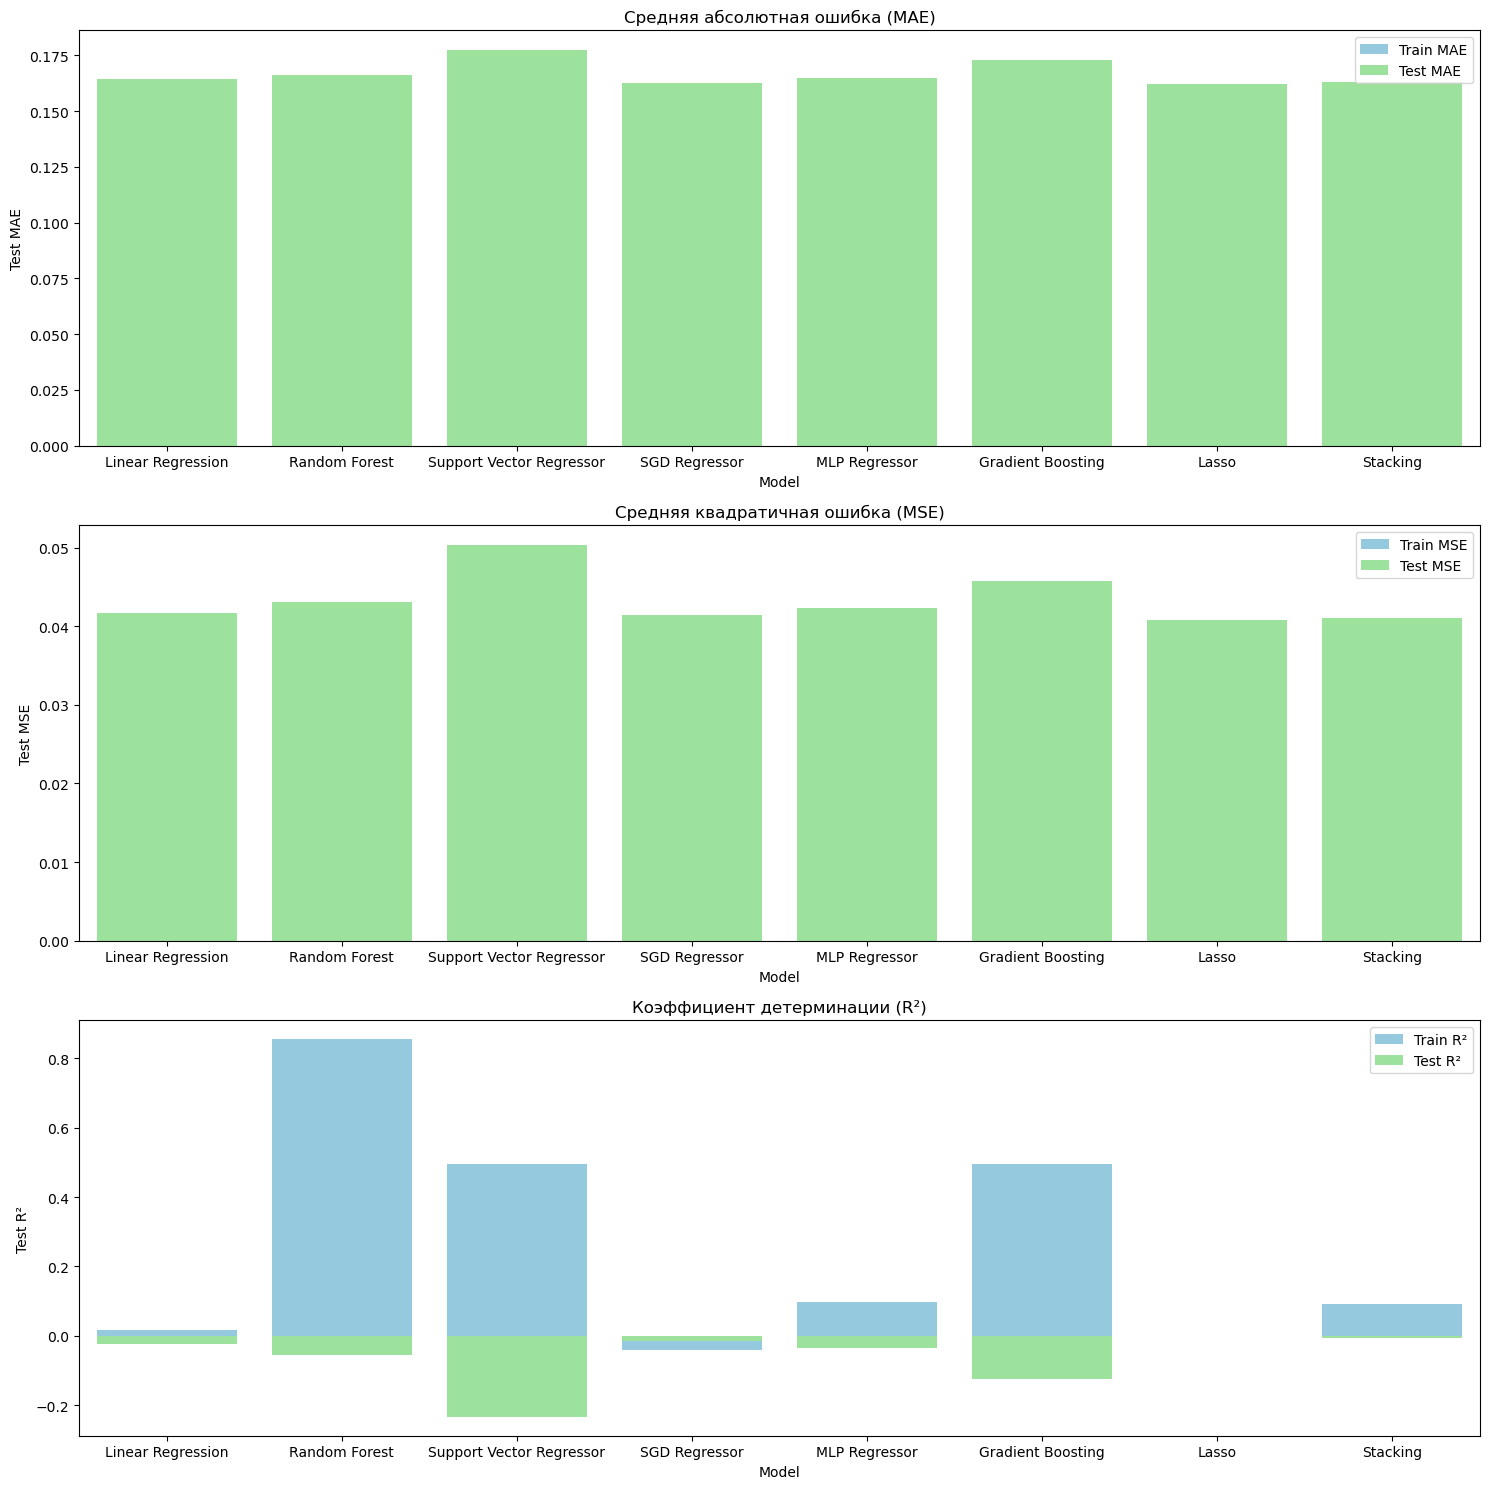

In [43]:
# Словарь для хранения метрик для обучающей и тестовой выборки
metrics = []

# Модели
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "SGD Regressor": SGDRegressor(),
    "MLP Regressor": MLPRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Lasso": Lasso(),
    "Stacking": stacking_model 
}

# Обучение и оценка моделей для обеих выборок (обучающей и тестовой)
for name, model in models.items():
    # Обучение модели
    model.fit(X_train_df_cleaned_normalized_df, y_train_df_cleaned_normalized_df)

    # Предсказания для обучающей выборки
    y_train_pred = model.predict(X_train_df_cleaned_normalized_df)

    # Предсказания для тестовой выборки
    y_test_pred = model.predict(X_test_df_normalized_df)

    # Оценка метрик для обучающей выборки
    train_mae = mean_absolute_error(y_train_df_cleaned_normalized_df, y_train_pred)
    train_mse = mean_squared_error(y_train_df_cleaned_normalized_df, y_train_pred)
    train_r2 = r2_score(y_train_df_cleaned_normalized_df, y_train_pred)

    # Оценка метрик для тестовой выборки
    test_mae = mean_absolute_error(y_test_df_normalized_df, y_test_pred)
    test_mse = mean_squared_error(y_test_df_normalized_df, y_test_pred)
    test_r2 = r2_score(y_test_df_normalized_df, y_test_pred)

    # Добавляем результаты в список
    metrics.append({
        "Model": name,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R²": train_r2,
        "Test R²": test_r2
    })

# Создаем DataFrame для результатов
metrics_df = pd.DataFrame(metrics)

# Выводим таблицу с результатами
print("Сводная таблица метрик для обучающей и тестовой выборки:")
print(metrics_df)

# Визуализируем результаты
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# График для MAE
sns.barplot(x='Model', y='Train MAE', data=metrics_df, ax=axes[0], color='skyblue', label='Train MAE')
sns.barplot(x='Model', y='Test MAE', data=metrics_df, ax=axes[0], color='lightgreen', label='Test MAE')
axes[0].set_title('Средняя абсолютная ошибка (MAE)')
axes[0].legend()

# График для MSE
sns.barplot(x='Model', y='Train MSE', data=metrics_df, ax=axes[1], color='skyblue', label='Train MSE')
sns.barplot(x='Model', y='Test MSE', data=metrics_df, ax=axes[1], color='lightgreen', label='Test MSE')
axes[1].set_title('Средняя квадратичная ошибка (MSE)')
axes[1].legend()

# График для R²
sns.barplot(x='Model', y='Train R²', data=metrics_df, ax=axes[2], color='skyblue', label='Train R²')
sns.barplot(x='Model', y='Test R²', data=metrics_df, ax=axes[2], color='lightgreen', label='Test R²')
axes[2].set_title('Коэффициент детерминации (R²)')
axes[2].legend()

plt.tight_layout()
plt.show()

In [56]:
y_test_pred

array([0.48021859, 0.47446704, 0.45222023, 0.46957313, 0.47889889,
       0.47540195, 0.46466451, 0.4729271 , 0.4701377 , 0.48366983,
       0.45640843, 0.46595698, 0.47209023, 0.47635033, 0.48685226,
       0.46316991, 0.46925233, 0.45947415, 0.47126954, 0.47609905,
       0.4812297 , 0.46758986, 0.47385178, 0.46977511, 0.48135396,
       0.48127767, 0.47041069, 0.45477614, 0.45924454, 0.46213374,
       0.47095083, 0.47603689, 0.46496909, 0.4725161 , 0.50683438,
       0.47635563, 0.46967915, 0.45770283, 0.45331052, 0.47932305,
       0.49614054, 0.46650517, 0.47033134, 0.47359962, 0.47831452,
       0.47272404, 0.4750462 , 0.47299124, 0.46090414, 0.47620476,
       0.47624723, 0.47357081, 0.47193072, 0.46400206, 0.47554371,
       0.46327186, 0.47510793, 0.46106988, 0.47561214, 0.47119699,
       0.46179561, 0.47262446, 0.47211119, 0.45924599, 0.47508555,
       0.4759437 , 0.48269603, 0.46771956, 0.47305783, 0.46714443,
       0.47995013, 0.47326603, 0.45763978, 0.46186097, 0.48082

### Вывод:


•	Лучшая модель на обучении: Random Forest показывает результаты с высоким R² (0.852360) и низкими значениями MAE и MSE. Это делает её лучшей моделью для обучающих данных

.
•	Лучшая модель на тестовых данных: Lasso имеет наименьшие MAE и MSE на тестовой выборке, а также лучшую модель среди всех с самым близким к нулю значениеR2

².
•	Однако, стоит отметить, что все модели показывают довольно низкие значения R², что говорит о сложности задачи или о плохом качестве данных.


In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
rf.fit(X_train_df_cleaned_normalized_df, y_train_df_cleaned_normalized_df)

# Получаем важность признаков
feature_importances = rf.feature_importances_

# Сортируем признаки по их важности
importance_df = pd.DataFrame({
    'Feature': X_train_df_cleaned_normalized_df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Выбираем наиболее важные признаки, выделяем, топ-5
important_features = importance_df['Feature'].head(5).values
X_train_selected = X_train_df_cleaned_normalized_df[important_features]
X_test_selected = X_test_df_normalized_df[important_features]

print("Выбранные признаки:", important_features)

                            Feature  Importance
3       Количество отвердителя, м.%    0.121843
5          Температура вспышки, С_2    0.100411
8           Потребление смолы, г/м2    0.093971
1                  Плотность, кг/м3    0.091434
7     Прочность при растяжении, МПа    0.088512
10                      Шаг нашивки    0.087455
4   Содержание эпоксидных групп,%_2    0.084490
2             модуль упругости, ГПа    0.082468
11                Плотность нашивки    0.079987
0   Соотношение матрица-наполнитель    0.079871
6     Поверхностная плотность, г/м2    0.077169
9                Угол нашивки, град    0.012389
Выбранные признаки: ['Количество отвердителя, м.%' 'Температура вспышки, С_2'
 'Потребление смолы, г/м2' 'Плотность, кг/м3'
 'Прочность при растяжении, МПа']


In [45]:
X_train_df2=X_train_df_cleaned_normalized_df.drop(['Шаг нашивки', 'Содержание эпоксидных групп,%_2', 'Плотность нашивки', 'модуль упругости, ГПа', 
                        'Поверхностная плотность, г/м2', 'Угол нашивки, град','Соотношение матрица-наполнитель'], axis=1)

y_train_df2 = y_train_df_cleaned_normalized_df
X_test_df2=X_test_df_normalized_df.drop(['Шаг нашивки', 'Содержание эпоксидных групп,%_2', 'Плотность нашивки', 'модуль упругости, ГПа', 
                        'Поверхностная плотность, г/м2', 'Угол нашивки, град','Соотношение матрица-наполнитель'], axis=1)

y_test_df2 = y_test_df_normalized_df
assert list(X_train_df2.columns) == list(X_test_df2.columns)

In [46]:
X_train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Плотность, кг/м3               650 non-null    float64
 1   Количество отвердителя, м.%    650 non-null    float64
 2   Температура вспышки, С_2       650 non-null    float64
 3   Прочность при растяжении, МПа  650 non-null    float64
 4   Потребление смолы, г/м2        650 non-null    float64
dtypes: float64(5)
memory usage: 25.5 KB


In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42) 

# Обучение модели
rf.fit(X_train_df2, y_train_df2)

# Проверка важности признаков
importances = rf.feature_importances_
print("Feature importances:", importances)

# Предсказание на обучающей выборке
y_pred1 = rf.predict(X_train_df2)

# Предсказание на тестовой выборке
y_pred2 = rf.predict(X_test_df2)

# MSE и R²
mse1 = mean_squared_error(y_train_df2, y_pred1)
r2_1 = r2_score(y_train_df2, y_pred1)
mse2 = mean_squared_error(y_test_df2, y_pred2)
r2_2 = r2_score(y_test_df2, y_pred2)

print(f"Training MSE: {mse1}")
print(f"Training R²: {r2_1}")
print(f"Test MSE: {mse2}")
print(f"Test R²: {r2_2}")

Feature importances: [0.19302481 0.23123787 0.20001474 0.18577235 0.18995023]
Training MSE: 0.00574317913233795
Training R²: 0.8502135880415438
Test MSE: 0.04369094693388416
Test R²: -0.07186552280144554


### Lasso

In [48]:
# Определяем целевую переменную Y 
Y = X_full['Модуль упругости при растяжении, ГПа']
X = X_full.drop(columns=['Модуль упругости при растяжении, ГПа'])

# Разделение на обучающую и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

# Нормализация целевой переменной
scaler_y = MinMaxScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1))

# Стандартизация признаков
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)


LASSO Regression Results:
Train MSE: 9.6005, R2: 0.0163
Test MSE: 9.7423, R2: -0.0125

LASSO Coefficients:
                            Feature  Coefficient
0   Соотношение матрица-наполнитель     0.000000
1                  Плотность, кг/м3     0.000000
2             модуль упругости, ГПа     0.037297
3       Количество отвердителя, м.%    -0.248640
4   Содержание эпоксидных групп,%_2     0.050507
5          Температура вспышки, С_2     0.000000
6     Поверхностная плотность, г/м2     0.000000
7     Прочность при растяжении, МПа    -0.069234
8           Потребление смолы, г/м2     0.050471
9                Угол нашивки, град     0.000000
10                      Шаг нашивки    -0.000000
11                Плотность нашивки     0.000000


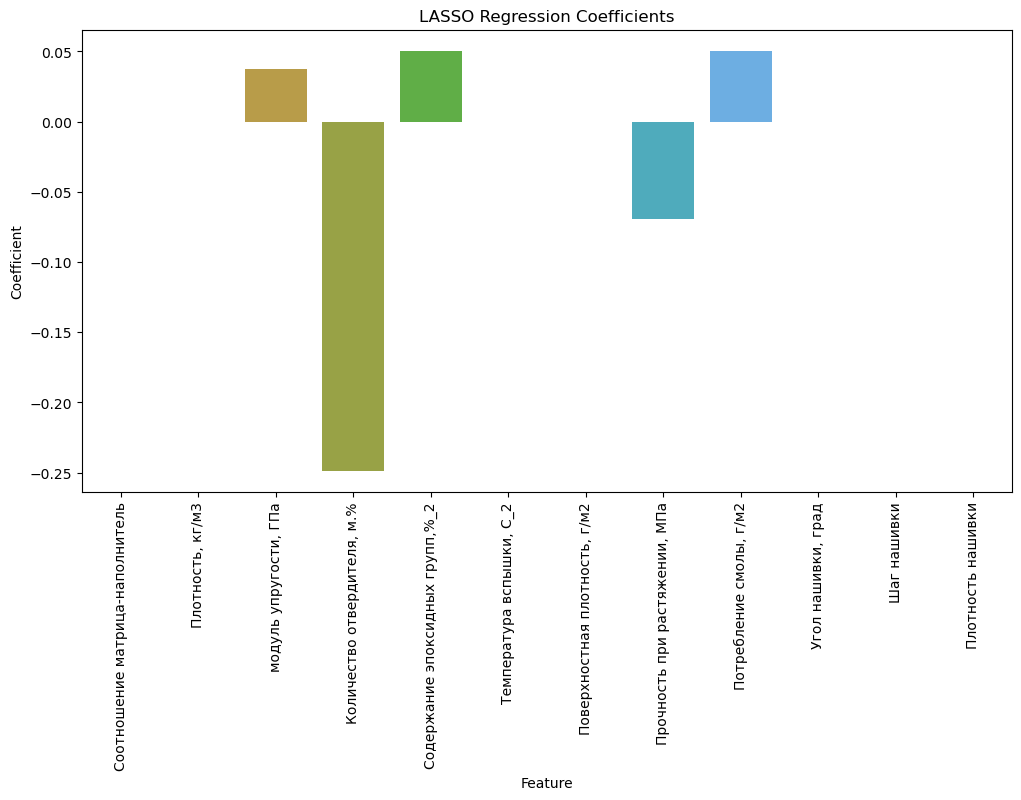

In [49]:
# Реализация LASSO-регрессии
alpha = 0.1  # Параметр регуляризации
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, Y_train)

# Предсказания
Y_pred_train = lasso.predict(X_train_scaled)
Y_pred_test = lasso.predict(X_test_scaled)

# Оценка качества модели
train_mse = mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

print("LASSO Regression Results:")
print(f"Train MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Коэффициенты модели
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print("\nLASSO Coefficients:")
print(lasso_coefficients)

# Визуализация коэффициентов
plt.figure(figsize=(12, 6))
sns.barplot(data=lasso_coefficients, x='Feature', y='Coefficient')
plt.xticks(rotation=90)
plt.title('LASSO Regression Coefficients')
plt.show()


LASSO Regression Results:
Best alpha: 0.1
Train MSE: 9.6005, R2: 0.0163
Test MSE: 9.7423, R2: -0.0125

LASSO Coefficients:
                            Feature  Coefficient
0   Соотношение матрица-наполнитель     0.000000
1                  Плотность, кг/м3     0.000000
2             модуль упругости, ГПа     0.037297
3       Количество отвердителя, м.%    -0.248640
4   Содержание эпоксидных групп,%_2     0.050507
5          Температура вспышки, С_2     0.000000
6     Поверхностная плотность, г/м2     0.000000
7     Прочность при растяжении, МПа    -0.069234
8           Потребление смолы, г/м2     0.050471
9                Угол нашивки, град     0.000000
10                      Шаг нашивки    -0.000000
11                Плотность нашивки     0.000000


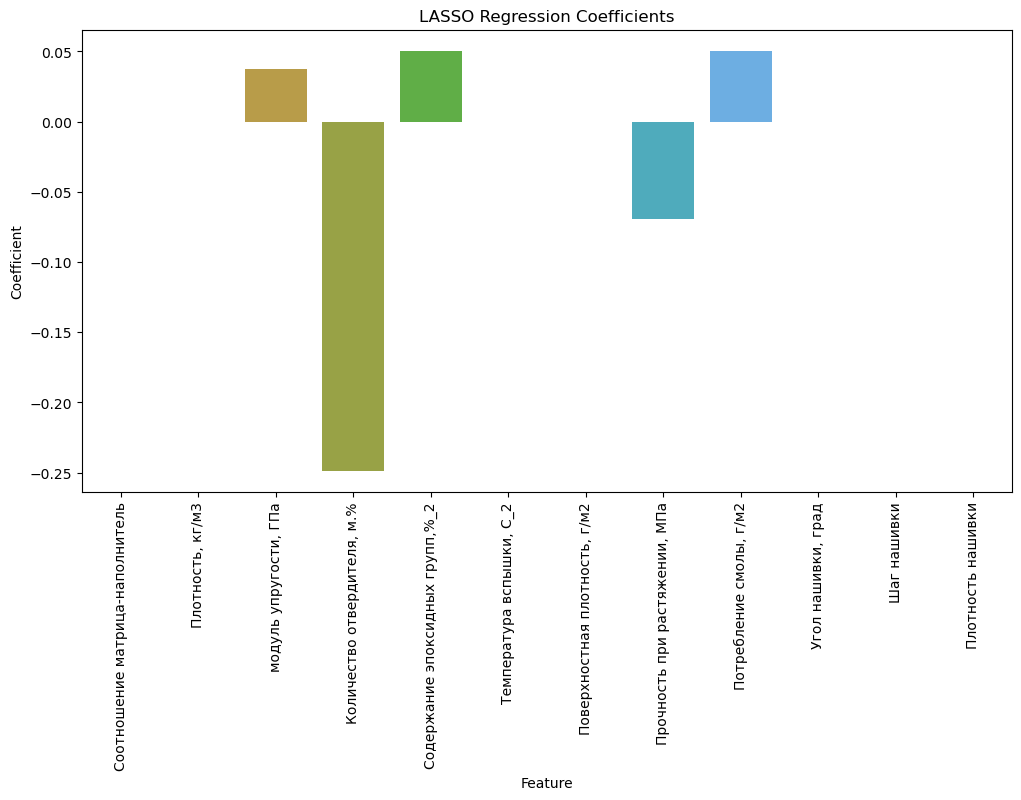

In [50]:
# Подбор параметра alpha с помощью GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, Y_train)

# Лучшая модель
best_alpha = grid_search.best_params_['alpha']
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, Y_train)

# Предсказания
Y_pred_train = lasso_best.predict(X_train_scaled)
Y_pred_test = lasso_best.predict(X_test_scaled)

# Оценка качества модели
train_mse = mean_squared_error(Y_train, Y_pred_train)
test_mse = mean_squared_error(Y_test, Y_pred_test)
train_r2 = r2_score(Y_train, Y_pred_train)
test_r2 = r2_score(Y_test, Y_pred_test)

print("LASSO Regression Results:")
print(f"Best alpha: {best_alpha}")
print(f"Train MSE: {train_mse:.4f}, R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, R2: {test_r2:.4f}")

# Коэффициенты модели
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_best.coef_
})
print("\nLASSO Coefficients:")
print(lasso_coefficients)

# Визуализация коэффициентов
plt.figure(figsize=(12, 6))
sns.barplot(data=lasso_coefficients, x='Feature', y='Coefficient')
plt.xticks(rotation=90)
plt.title('LASSO Regression Coefficients')
plt.show()


In [51]:
X_train_scaled.shape

(716, 12)

In [52]:
X_train_scaled.shape[1]

12

In [53]:
# Построение нейронной сети
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

# Обучение модели
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Оценка модели
train_loss, train_mae = model.evaluate(X_train_scaled, Y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test_scaled, Y_test, verbose=0)

print("Neural Network Results:")
print(f"Train MSE: {train_loss:.4f}, MAE: {train_mae:.4f}")
print(f"Test MSE: {test_loss:.4f}, MAE: {test_mae:.4f}")

# Предсказания
Y_pred_test = model.predict(X_test_scaled)

# Оценка R2
test_r2 = r2_score(Y_test, Y_pred_test)
print(f"Test R2 Score: {test_r2:.4f}")

# Визуализация обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\Kirill Shumkin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3061.0562 - mae: 50.2465 - val_loss: 375.5382 - val_mae: 17.0161
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 272.8869 - mae: 13.6027 - val_loss: 132.0644 - val_mae: 9.6905
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 189.8603 - mae: 10.9189 - val_loss: 85.7647 - val_mae: 7.5240
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 145.1107 - mae: 9.4160 - val_loss: 101.3332 - val_mae: 8.3815
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 116.5262 - mae: 8.5508 - val_loss: 73.3868 - val_mae: 6.9403
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 114.1248 - mae: 8.5725 - val_loss: 43.6563 - val_mae: 5.4239
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.1870 - mae: 7.5778 - val_loss: 36.0592 - val_mae: 4.9106
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 76.4741 - mae: 7.1223 - val_loss: 33.6186 - val_mae: 4.6944
Epoch 9/100
36/36 ━━━━━━━━━━━━━━


KeyboardInterrupt



### LightGBM

In [57]:
# Переименовываем поля

X_train_df.rename(columns={'Соотношение матрица-наполнитель': 'Matrix-Filler_Ratio', 'Плотность, кг/м3': 'Density','модуль упругости, ГПа': 'Elastic_Modulus',
                  'Количество отвердителя, м.%': 'Hardener_Content','Содержание эпоксидных групп,%_2': 'Epoxy_Group_Content','Температура вспышки, С_2': 'Flash_Point_Temperature',
                   'Поверхностная плотность, г/м2': 'Surface_Density','Модуль упругости при растяжении, ГПа': 'Tensile_Elastic_Modulus',
                  'Прочность при растяжении, МПа': 'Tensile_Strength','Потребление смолы, г/м2': 'Resin_Consumption','Угол нашивки, град': 'Stitch_Angle','Шаг нашивки': 'Stitch_Pitch','Плотность нашивки': 'Stitch_Density',
                  }, inplace=True)
y_train_df.name = 'Tensile_Elastic_Modulus'
y_test_df.name = 'Tensile_Elastic_Modulus'
X_test_df.rename(columns={'Соотношение матрица-наполнитель': 'Matrix-Filler_Ratio', 'Плотность, кг/м3': 'Density','модуль упругости, ГПа': 'Elastic_Modulus',
                  'Количество отвердителя, м.%': 'Hardener_Content','Содержание эпоксидных групп,%_2': 'Epoxy_Group_Content','Температура вспышки, С_2': 'Flash_Point_Temperature',
                   'Поверхностная плотность, г/м2': 'Surface_Density','Модуль упругости при растяжении, ГПа': 'Tensile_Elastic_Modulus',
                  'Прочность при растяжении, МПа': 'Tensile_Strength','Потребление смолы, г/м2': 'Resin_Consumption','Угол нашивки, град': 'Stitch_Angle','Шаг нашивки': 'Stitch_Pitch','Плотность нашивки': 'Stitch_Density',
                  }, inplace=True)

In [58]:
# Инициализация модели LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, max_depth=3, random_state=42)

lgb_model.fit(X_train_df, y_train_df)

# Предсказания на тестовой выборке
y_pred_lgb = lgb_model.predict(X_test_df)

# Оценка модели
mse_lgb = mean_squared_error(y_test_df, y_pred_lgb)
r2_lgb = r2_score(y_test_df, y_pred_lgb)

print(f"Test MSE (LightGBM): {mse_lgb}")
print(f"Test R² (LightGBM): {r2_lgb}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2631
[LightGBM] [Info] Number of data points in the train set: 716, number of used features: 12
[LightGBM] [Info] Start training from score 73.322714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

#### Для 2 задачи

In [ ]:
# Словарь для хранения метрик для обучающей и тестовой выборки
metrics = []

# Модели
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "SGD Regressor": SGDRegressor(),
    "MLP Regressor": MLPRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Lasso": Lasso(),
    "Stacking": stacking_model 
}

# Обучение и оценка моделей для обеих выборок (обучающей и тестовой)
for name, model in models.items():
    # Обучение модели
    model.fit(X_train_df_cleaned_normalized_df2, y_train_df_cleaned_normalized_df2)

    # Предсказания для обучающей выборки
    y_train_pred = model.predict(X_train_df_cleaned_normalized_df2)

    # Предсказания для тестовой выборки
    y_test_pred = model.predict(X_test_df_normalized_df2)

    # Оценка метрик для обучающей выборки
    train_mae = mean_absolute_error(y_train_df_cleaned_normalized_df2, y_train_pred)
    train_mse = mean_squared_error(y_train_df_cleaned_normalized_df2, y_train_pred)
    train_r2 = r2_score(y_train_df_cleaned_normalized_df2, y_train_pred)

    # Оценка метрик для тестовой выборки
    test_mae = mean_absolute_error(y_test_df_normalized_df2, y_test_pred)
    test_mse = mean_squared_error(y_test_df_normalized_df2, y_test_pred)
    test_r2 = r2_score(y_test_df_normalized_df2, y_test_pred)

    # Добавляем результаты в список
    metrics.append({
        "Model": name,
        "Train MAE": train_mae,
        "Test MAE": test_mae,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R²": train_r2,
        "Test R²": test_r2
    })

# Создаем DataFrame для результатов
metrics_df = pd.DataFrame(metrics)

# Выводим таблицу с результатами
print("Сводная таблица метрик для обучающей и тестовой выборки:")
print(metrics_df)

# Визуализируем результаты
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# График для MAE
sns.barplot(x='Model', y='Train MAE', data=metrics_df, ax=axes[0], color='skyblue', label='Train MAE')
sns.barplot(x='Model', y='Test MAE', data=metrics_df, ax=axes[0], color='lightgreen', label='Test MAE')
axes[0].set_title('Средняя абсолютная ошибка (MAE)')
axes[0].legend()

# График для MSE
sns.barplot(x='Model', y='Train MSE', data=metrics_df, ax=axes[1], color='skyblue', label='Train MSE')
sns.barplot(x='Model', y='Test MSE', data=metrics_df, ax=axes[1], color='lightgreen', label='Test MSE')
axes[1].set_title('Средняя квадратичная ошибка (MSE)')
axes[1].legend()

# График для R²
sns.barplot(x='Model', y='Train R²', data=metrics_df, ax=axes[2], color='skyblue', label='Train R²')
sns.barplot(x='Model', y='Test R²', data=metrics_df, ax=axes[2], color='lightgreen', label='Test R²')
axes[2].set_title('Коэффициент детерминации (R²)')
axes[2].legend()

plt.tight_layout()
plt.show()

1. Linear Regression
Модель линейной регрессии имеет низкие значения MAE и MSE как для обучающих, так и для тестовых данных. Однако R² остаётся низким (около 0 на обучающих данных и отрицательным на тесте), что говорит о слабой способности модели объяснять вариацию данных. Линейная регрессия может не быть лучшим выбором для данной задачи.
2. Random Forest
Random Forest показывает отличные результаты на обучающих данных, с очень низким MAE и MSE и высоким R² (0.86). Однако на тестовых данных модель демонстрирует ухудшение, что указывает на переобучение. Несмотря на это, она остаётся одной из лучших моделей для обучения, хотя обобщение на тестовых данных является её слабостью.
3. Ridge Regression
Ridge Regression имеет похожие результаты с линейной регрессией, показывая те же значения MAE и MSE. Модель не объясняет данные хорошо, и её производительность ухудшается на тестовых данных. Возможно, Ridge не подходит для данной задачи.
4. Support Vector Regressor
Support Vector Regressor показывает хорошие результаты на обучающих данных с низкими значениями MAE и MSE, но сильно ухудшается на тестовых данных. R² также падает на тесте, что указывает на переобучение. Это также не является идеальной моделью для данной задачи.
5. SGD Regressor
SGD Regressor демонстрирует стабильные значения MAE и MSE как на обучающих, так и на тестовых данных, но его R² остаётся низким на обоих наборах данных, что свидетельствует о низкой объясняющей способности модели.
6. MLP Regressor
MLP Regressor (нейронная сеть) показывает неплохие результаты на обучающих данных, но её производительность значительно ухудшается на тесте. Низкие значения R² указывают на проблемы с обобщением модели.
7. Gradient Boosting
Gradient Boosting показывает хорошие результаты на обучающих данных, но также сильно ухудшается на тестовых, что указывает на возможное переобучение. Модель показывает стабильные метрики, но её обобщение на новых данных оставляет желать лучшего.
8. Lasso
Lasso даёт стабильные результаты по MAE и MSE, но её способность объяснять данные (по R²) минимальна. Это может быть связано с высокой регуляризацией, ограничивающей способность модели для более сложных зависимостей.
9. Stacking
Stacking (комбинированная модель) имеет схожие результаты с другими моделями, но её R² остаётся отрицательным как на обучении, так и на тесте, что говорит о её слабой способности 
о### бъяснять  анные.
Выводы по выб
ору лучшей модели:
Лучшая модель на обучении: Random Forest имеет наилучший R² (0.86) и низкие значения MAE и MSE, что указывает на хорошее подстраивание под данные обучающей выборки. Однако она переобучается на тестовой выборке.
Лучшая модель на тесте: Random Forest также имеет наименьшее MAE на тестовых данных среди всех моделей (0.16), но её R² существенно снижается на тестовой выборке. Наиболее стабильными остаются Linear Regression и Lasso, но их R² остаются близкими к нулю, что свидетельствует о слабой способности модели объяснять зависимость.


In [ ]:
Y = X_full['Прочность при растяжении, МПа']
X = X_full.drop(columns=['Прочность при растяжении, МПа'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

# Нормализация целевой переменной
scaler_y = MinMaxScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1))

# Стандартизация признаков
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Улучшенная архитектура нейронной сети
model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early stopping для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Обучение модели
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2,
                    epochs=500, batch_size=32, callbacks=[early_stopping], verbose=1)

# Предсказание и оценка
Y_pred_scaled = model.predict(X_test_scaled)
Y_pred_rescaled = scaler_y.inverse_transform(Y_pred_scaled)

# Метрики
mse_nn = mean_squared_error(Y_test, Y_pred_rescaled)
r2_nn = r2_score(Y_test, Y_pred_rescaled)

print(f"\nImproved Neural Network Test MSE: {mse_nn}")
print(f"Improved Neural Network Test R²: {r2_nn}")

# Визуализация обучения
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Инициализация модели Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучение модели
rf_model.fit(X_train_df_cleaned_normalized_df2, y_train_df_cleaned_normalized_df2)

# Сохранение обученной модели в файл .pkl
joblib.dump(rf_model, "random_forest_model.pkl")
print("Модель сохранена как random_forest_model.pkl")

#### 3 задача

In [ ]:
X = X_full.drop(columns=['Соотношение матрица-наполнитель'])
y = X_full['Соотношение матрица-наполнитель']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормализуем данные
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Стандартизация признаков
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)


In [ ]:
X_train_df_cleaned_normalized_df3.shape[1]

#### 1 вариант

In [ ]:
# Строим модель нейронной сети
model = Sequential()

# Входной слой (количество нейронов равно количеству признаков)
model.add(Dense(64, input_dim=X_train_df_cleaned_normalized_df3.shape[1], activation='relu'))

# Скрытые слои
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Выходной слой (один нейрон, так как мы предсказываем одно значение)
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Обучение модели
model.fit(X_train_df_cleaned_normalized_df3, y_train_df_cleaned_normalized_df3, epochs=20, batch_size=32, validation_data=(X_test_df_normalized_df3, y_test_df_normalized_df3))

# Предсказания на обучающей выборке
y_pred_train = model.predict(X_train_df_cleaned_normalized_df3)

# Предсказания на тестовой выборке
y_pred_test = model.predict(X_test_df_normalized_df3)

# Оценка модели на обучающих данных
mse_train = mean_squared_error(y_train_df_cleaned_normalized_df3, y_pred_train)
r2_train = r2_score(y_train_df_cleaned_normalized_df3, y_pred_train)
mae_train = mean_absolute_error(y_train_df_cleaned_normalized_df3, y_pred_train)

# Оценка модели на тестовых данных
mse_test = mean_squared_error(y_test_df_normalized_df3, y_pred_test)
r2_test = r2_score(y_test_df_normalized_df3, y_pred_test)
mae_test = mean_absolute_error(y_test_df_normalized_df3, y_pred_test)

# Вывод результатов
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")

# Визуализация: Сравнение предсказанных и истинных значений для обучающей выборки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_df_cleaned_normalized_df3, y_pred_train)
plt.plot([min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)], [min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)], color='red', linestyle='--')
plt.title("Train: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Визуализация: Сравнение предсказанных и истинных значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(y_test_df_normalized_df3, y_pred_test)
plt.plot([min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)], [min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)], color='red', linestyle='--')
plt.title("Test: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


#### 2 вариант

In [ ]:
# Строим модель нейронной сети
model = Sequential()

# Входной слой (количество нейронов равно количеству признаков)
model.add(Dense(128, input_dim=X_train_df_cleaned_normalized_df3.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Скрытые слои
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой (один нейрон, так как мы предсказываем одно значение)
model.add(Dense(1))

# Компиляция модели с оптимизатором Adam и функцией потерь Huber
model.compile(optimizer=Adam(learning_rate=0.0005), loss=Huber(), metrics=['mean_absolute_error'])

# Обучение модели с историей для графиков потерь
history = model.fit(X_train_df_cleaned_normalized_df3, y_train_df_cleaned_normalized_df3, 
                    epochs=100, batch_size=32, validation_data=(X_test_df_normalized_df3, y_test_df_normalized_df3))

# Предсказания на обучающей выборке
y_pred_train = model.predict(X_train_df_cleaned_normalized_df3)

# Предсказания на тестовой выборке
y_pred_test = model.predict(X_test_df_normalized_df3)

# Оценка модели на обучающих данных
mse_train = mean_squared_error(y_train_df_cleaned_normalized_df3, y_pred_train)
r2_train = r2_score(y_train_df_cleaned_normalized_df3, y_pred_train)
mae_train = mean_absolute_error(y_train_df_cleaned_normalized_df3, y_pred_train)

# Оценка модели на тестовых данных
mse_test = mean_squared_error(y_test_df_normalized_df3, y_pred_test)
r2_test = r2_score(y_test_df_normalized_df3, y_pred_test)
mae_test = mean_absolute_error(y_test_df_normalized_df3, y_pred_test)

# Вывод результатов
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")

# Визуализация: Сравнение предсказанных и истинных значений для обучающей выборки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_df_cleaned_normalized_df3, y_pred_train)
plt.plot([min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)], [min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)], color='red', linestyle='--')
plt.title("Train: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Визуализация: Сравнение предсказанных и истинных значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(y_test_df_normalized_df3, y_pred_test)
plt.plot([min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)], [min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)], color='red', linestyle='--')
plt.title("Test: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

# Визуализация: график потерь
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### 3 вариант

In [ ]:
# Улучшенная архитектура нейронной сети
model = Sequential()

# Входной слой
model.add(Dense(512, input_dim=X_train_df_cleaned_normalized_df3.shape[1], activation='elu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Первый скрытый слой
model.add(Dense(256, activation='elu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Второй скрытый слой
model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Третий скрытый слой
model.add(Dense(64, activation='elu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(1, activation='linear'))

# Компиляция модели
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss=MeanSquaredError(), metrics=['mean_absolute_error'])

# Early stopping для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Обучение модели
history = model.fit(
    X_train_df_cleaned_normalized_df3,
    y_train_df_cleaned_normalized_df3,
    epochs=500,
    batch_size=64,
    validation_data=(X_test_df_normalized_df3, y_test_df_normalized_df3),
    callbacks=[early_stopping],
    verbose=1
)

# Предсказания на обучающей выборке
y_pred_train = model.predict(X_train_df_cleaned_normalized_df3)

# Предсказания на тестовой выборке
y_pred_test = model.predict(X_test_df_normalized_df3)

# Оценка модели на обучающих данных
mse_train = mean_squared_error(y_train_df_cleaned_normalized_df3, y_pred_train)
r2_train = r2_score(y_train_df_cleaned_normalized_df3, y_pred_train)
mae_train = mean_absolute_error(y_train_df_cleaned_normalized_df3, y_pred_train)

# Оценка модели на тестовых данных
mse_test = mean_squared_error(y_test_df_normalized_df3, y_pred_test)
r2_test = r2_score(y_test_df_normalized_df3, y_pred_test)
mae_test = mean_absolute_error(y_test_df_normalized_df3, y_pred_test)

# Вывод результатов
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")

# Визуализация обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Визуализация: Сравнение предсказанных и истинных значений для обучающей выборки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train_df_cleaned_normalized_df3, y_pred_train)
plt.plot([min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)],
         [min(y_train_df_cleaned_normalized_df3), max(y_train_df_cleaned_normalized_df3)], color='red', linestyle='--')
plt.title("Train: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Визуализация: Сравнение предсказанных и истинных значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(y_test_df_normalized_df3, y_pred_test)
plt.plot([min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)],
         [min(y_test_df_normalized_df3), max(y_test_df_normalized_df3)], color='red', linestyle='--')
plt.title("Test: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


#### 4 вариант

In [ ]:
# Преобразуем Y в логарифмический масштаб для стабилизации обучения
Y = np.log1p(Y)

# Разделение на обучающую и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

# Нормализация целевой переменной
scaler_y = MinMaxScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1))

# Стандартизация признаков
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Создание нейронной сети
model = Sequential()

# Входной слой
model.add(Dense(128, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Скрытые слои
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Выходной слой с ReLU активацией для гарантии неотрицательных значений
model.add(Dense(1, activation='relu'))

# Компиляция модели
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss=Huber(), metrics=['mean_absolute_error'])

# Callbacks для оптимизации
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

# Обучение модели
history = model.fit(X_train_scaled, Y_train_scaled, 
                    epochs=500, batch_size=32, 
                    validation_data=(X_test_scaled, Y_test_scaled), 
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Предсказания на обучающей выборке
Y_pred_train_scaled = model.predict(X_train_scaled)
Y_pred_train = np.expm1(scaler_y.inverse_transform(Y_pred_train_scaled))

# Предсказания на тестовой выборке
Y_pred_test_scaled = model.predict(X_test_scaled)
Y_pred_test = np.expm1(scaler_y.inverse_transform(Y_pred_test_scaled))

# Возвращаем Y к исходному масштабу
Y_train_orig = np.expm1(Y_train)
Y_test_orig = np.expm1(Y_test)

# Оценка модели на обучающих данных
mse_train = mean_squared_error(Y_train_orig, Y_pred_train)
r2_train = r2_score(Y_train_orig, Y_pred_train)
mae_train = mean_absolute_error(Y_train_orig, Y_pred_train)

# Оценка модели на тестовых данных
mse_test = mean_squared_error(Y_test_orig, Y_pred_test)
r2_test = r2_score(Y_test_orig, Y_pred_test)
mae_test = mean_absolute_error(Y_test_orig, Y_pred_test)

# Вывод результатов
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")

# Визуализация: график потерь
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Визуализация: Сравнение предсказанных и истинных значений для обучающей выборки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train_orig, Y_pred_train, alpha=0.5)
plt.plot([min(Y_train_orig), max(Y_train_orig)], [min(Y_train_orig), max(Y_train_orig)], color='red', linestyle='--')
plt.title("Train: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Визуализация: Сравнение предсказанных и истинных значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(Y_test_orig, Y_pred_test, alpha=0.5)
plt.plot([min(Y_test_orig), max(Y_test_orig)], [min(Y_test_orig), max(Y_test_orig)], color='red', linestyle='--')
plt.title("Test: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Преобразуем Y в логарифмический масштаб для стабилизации обучения
Y = np.log1p(Y)

# Разделение на обучающую и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=24)

# Нормализация целевой переменной
scaler_y = MinMaxScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_y.transform(Y_test.values.reshape(-1, 1))

# Стандартизация признаков
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Создание нейронной сети
model = Sequential()

# Входной слой
model.add(Dense(128, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Скрытые слои
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Выходной слой с ReLU активацией для гарантии неотрицательных значений
model.add(Dense(1, activation='relu'))

# Компиляция модели
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss=Huber(), metrics=['mean_absolute_error'])

# Callbacks для оптимизации
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)

# Обучение модели
history = model.fit(X_train_scaled, Y_train_scaled, 
                    epochs=500, batch_size=32, 
                    validation_data=(X_test_scaled, Y_test_scaled), 
                    callbacks=[early_stopping, lr_scheduler], verbose=1)

# Предсказания на обучающей выборке
Y_pred_train_scaled = model.predict(X_train_scaled)
Y_pred_train = np.expm1(scaler_y.inverse_transform(Y_pred_train_scaled))

# Предсказания на тестовой выборке
Y_pred_test_scaled = model.predict(X_test_scaled)
Y_pred_test = np.expm1(scaler_y.inverse_transform(Y_pred_test_scaled))

# Возвращаем Y к исходному масштабу
Y_train_orig = np.expm1(Y_train)
Y_test_orig = np.expm1(Y_test)

# Оценка модели на обучающих данных
mse_train = mean_squared_error(Y_train_orig, Y_pred_train)
r2_train = r2_score(Y_train_orig, Y_pred_train)
mae_train = mean_absolute_error(Y_train_orig, Y_pred_train)

# Оценка модели на тестовых данных
mse_test = mean_squared_error(Y_test_orig, Y_pred_test)
r2_test = r2_score(Y_test_orig, Y_pred_test)
mae_test = mean_absolute_error(Y_test_orig, Y_pred_test)

# Вывод результатов
print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")
print(f"Test MAE: {mae_test}")

# Визуализация: график потерь
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Визуализация: Сравнение предсказанных и истинных значений для обучающей выборки
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train_orig, Y_pred_train, alpha=0.5)
plt.plot([min(Y_train_orig), max(Y_train_orig)], [min(Y_train_orig), max(Y_train_orig)], color='red', linestyle='--')
plt.title("Train: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Визуализация: Сравнение предсказанных и истинных значений для тестовой выборки
plt.subplot(1, 2, 2)
plt.scatter(Y_test_orig, Y_pred_test, alpha=0.5)
plt.plot([min(Y_test_orig), max(Y_test_orig)], [min(Y_test_orig), max(Y_test_orig)], color='red', linestyle='--')
plt.title("Test: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [ ]:
# Дополнительный анализ
print("\nДополнительный анализ:")

# 1. Проверка утечки данных
print("Проверка утечки данных: обучение scaler_y только на обучающей выборке.")
print("Проверка утечки данных: обучение scaler_x только на обучающей выборке.")

# 2. Проверка корреляции признаков
print("Проверка корреляции:")
correlation_matrix = pd.DataFrame(X).corr()
print(correlation_matrix)

# 3. Проверка распределения предсказаний и истинных значений
plt.figure(figsize=(10, 5))
plt.hist(Y_test_orig, bins=50, alpha=0.5, label='True Values')
plt.hist(Y_pred_test, bins=50, alpha=0.5, label='Predicted Values')
plt.title("Distribution of True and Predicted Values")
plt.legend()
plt.show()


продолжение в файле "Шумкина М.И._вкр2"